## Authors

António azevedo - 1250494

Diogo Silva - 1211882

Hugo Ribeiro - 1250520

-------------------

This project focuses on the analysis of the bank.csv dataset, which contains information from direct marketing campaigns conducted by a retail banking institution.
Detailed metadata and a full description of the dataset are provided in the official documentation accompanying the file.

The primary objective of this project is to develop predictive models capable of determining whether a client will subscribe to a term deposit as a result of a marketing campaign.

To achieve this goal, the CRISP-DM methodology was applied, covering the following stages:
Data understanding and cleaning — addressing missing and unknown values, outliers, and feature encoding.
Data preparation — applying normalization, feature selection, and balancing techniques to handle class imbalance.
Modeling — training several machine learning algorithms including Logistic Regression, Decision Tree, Random Forest, KNN, Naïve Bayes, XGBoost, LightGBM, and MLP.
Evaluation — comparing model performance using metrics such as Precision, Recall, F1-Score, Balanced Accuracy, ROC-AUC, and MCC.

This comprehensive process aims to identify the key customer and campaign characteristics that most influence the likelihood of subscribing to a term deposit, ultimately supporting data-driven decision-making in future marketing strategies.

# Data Presentation


### Import essential libraries:

- for data manipulation and visualization: Numpy, Pandas, Seaborn, matplotlib

- for preprocessing and handling data imbalance: sklearn.preprocessing, sklearn.impute, imblearn.under_sampling

- for text processing: sklearn.feature_extraction.text

- for model building and evaluation: sklearn.model_selection, sklearn.metrics

- Machine learning models: sklearn.linear_model, sklearn.esemble, sklearn.svm, sklearn.neighbors, sklearn.naive_bayes

- Gradient boosting models: xgboost, lightgbm

- for building pipelines and transformations: sklearn.pipeline, sklearn.compose

- for statistical tests: scipy.stats

- Miscellaneous: warnings

In [304]:
# Core packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Data preprocessing
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Data splitting and evaluation
from sklearn.model_selection import (
    train_test_split, StratifiedKFold, cross_validate, RandomizedSearchCV, cross_val_score
)
from scipy.stats import chi2_contingency, f_oneway
from sklearn.metrics import (
    roc_auc_score, average_precision_score, f1_score,
    balanced_accuracy_score, matthews_corrcoef,
    classification_report, confusion_matrix,
    RocCurveDisplay, PrecisionRecallDisplay, make_scorer, 
    ConfusionMatrixDisplay, classification_report,
    confusion_matrix,
    roc_curve,
)

# Models 
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    HistGradientBoostingClassifier,
    StackingClassifier
)
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import RFE, SelectFromModel

# class imbalance & optimization
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from scipy.stats import randint, uniform, chi2_contingency

import warnings
warnings.filterwarnings('ignore')

# Plot settings
plt.style.use('fivethirtyeight')
%matplotlib inline
pd.set_option('display.max_columns', 32)

### Loading the dataset

In [305]:
df = pd.read_csv("bank_marketing/bank.csv", sep=";")

### First 5 rows of the dataset

In [306]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Last 5 rows of the dataset

In [307]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,239,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


### Checking how many columns (features + target) does the set contain

In [308]:
len(df.columns)

21

### Checking what columns the dataset has

In [309]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

### Checking the type of the colums

In [310]:
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
num_cols = [c for c in df.columns if c not in cat_cols]

print('\nCategorical columns:', cat_cols)
print('Numerical columns:', num_cols)


Categorical columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']
Numerical columns: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


### Checking the shape (rows, columns) in DataFrame

In [311]:
df.shape

(41188, 21)

### Checking the size (number of cells) in DataFrame

In [312]:
df.size

864948

### An overview of the data types, missing values, percentage of missing values, and the number of unique values for each column in the DataFrame

In [313]:
num_cols = df.select_dtypes(exclude='object').columns

data_info_num = pd.DataFrame({
    'Data Type': df[num_cols].dtypes,
    'Missing Values': df[num_cols].isnull().sum(),
    'Percentage Missing': (df[num_cols].isnull().sum() / len(df)) * 100,
    'Unique Values': df[num_cols].nunique()
})

data_info_num = data_info_num.sort_values(by='Missing Values', ascending=False)
data_info_num.style.format({'Percentage Missing': '{:.2f}%'})

,Data Type,Missing Values,Percentage Missing,Unique Values
age,int64,0,0.00%,78
duration,int64,0,0.00%,1544
campaign,int64,0,0.00%,42
pdays,int64,0,0.00%,27
previous,int64,0,0.00%,8
emp.var.rate,float64,0,0.00%,10
cons.price.idx,float64,0,0.00%,26
cons.conf.idx,float64,0,0.00%,26
euribor3m,float64,0,0.00%,316
nr.employed,float64,0,0.00%,11


In [314]:
cat_cols = df.select_dtypes(include='object').columns

cat_info = pd.DataFrame({
    'Data Type': df[cat_cols].dtypes,
    'Unknown Count': [(df[c] == 'unknown').sum() for c in cat_cols],
    'Unknown (%)': [(df[c].eq('unknown').sum() / len(df)) * 100 for c in cat_cols],
    'Unique Values': [df[c].nunique() for c in cat_cols]
})

cat_info = cat_info.sort_values(by='Unknown Count', ascending=False)
cat_info.style.format({'Unknown (%)': '{:.2f}%'})

,Data Type,Unknown Count,Unknown (%),Unique Values
default,object,8597,20.87%,3
education,object,1731,4.20%,8
housing,object,990,2.40%,3
loan,object,990,2.40%,3
job,object,330,0.80%,12
marital,object,80,0.19%,4
contact,object,0,0.00%,2
month,object,0,0.00%,10
day_of_week,object,0,0.00%,5
poutcome,object,0,0.00%,3


### Cross tabulation between categorical variable and the goal attribute

In [315]:
for predictor in cat_cols:
    print(pd.crosstab(index=df[predictor], columns=df['y']),'\n')

y                no   yes
job                      
admin.         9070  1352
blue-collar    8616   638
entrepreneur   1332   124
housemaid       954   106
management     2596   328
retired        1286   434
self-employed  1272   149
services       3646   323
student         600   275
technician     6013   730
unemployed      870   144
unknown         293    37 

y            no   yes
marital              
divorced   4136   476
married   22396  2532
single     9948  1620
unknown      68    12 

y                       no   yes
education                       
basic.4y              3748   428
basic.6y              2104   188
basic.9y              5572   473
high.school           8484  1031
illiterate              14     4
professional.course   4648   595
university.degree    10498  1670
unknown               1480   251 

y           no   yes
default             
no       28391  4197
unknown   8154   443
yes          3     0 

y           no   yes
housing             
no       16596  202

### Numerical Feature Distributions

To better understand the data distribution of each **numerical variable**, histograms were plotted with **Kernel Density Estimation (KDE)**.  
This visualization helps identify skewness, outliers, and potential normalization needs before model training.

The code below dynamically arranges the plots in a grid based on the total number of numerical features, ensuring a clear and organized layout.

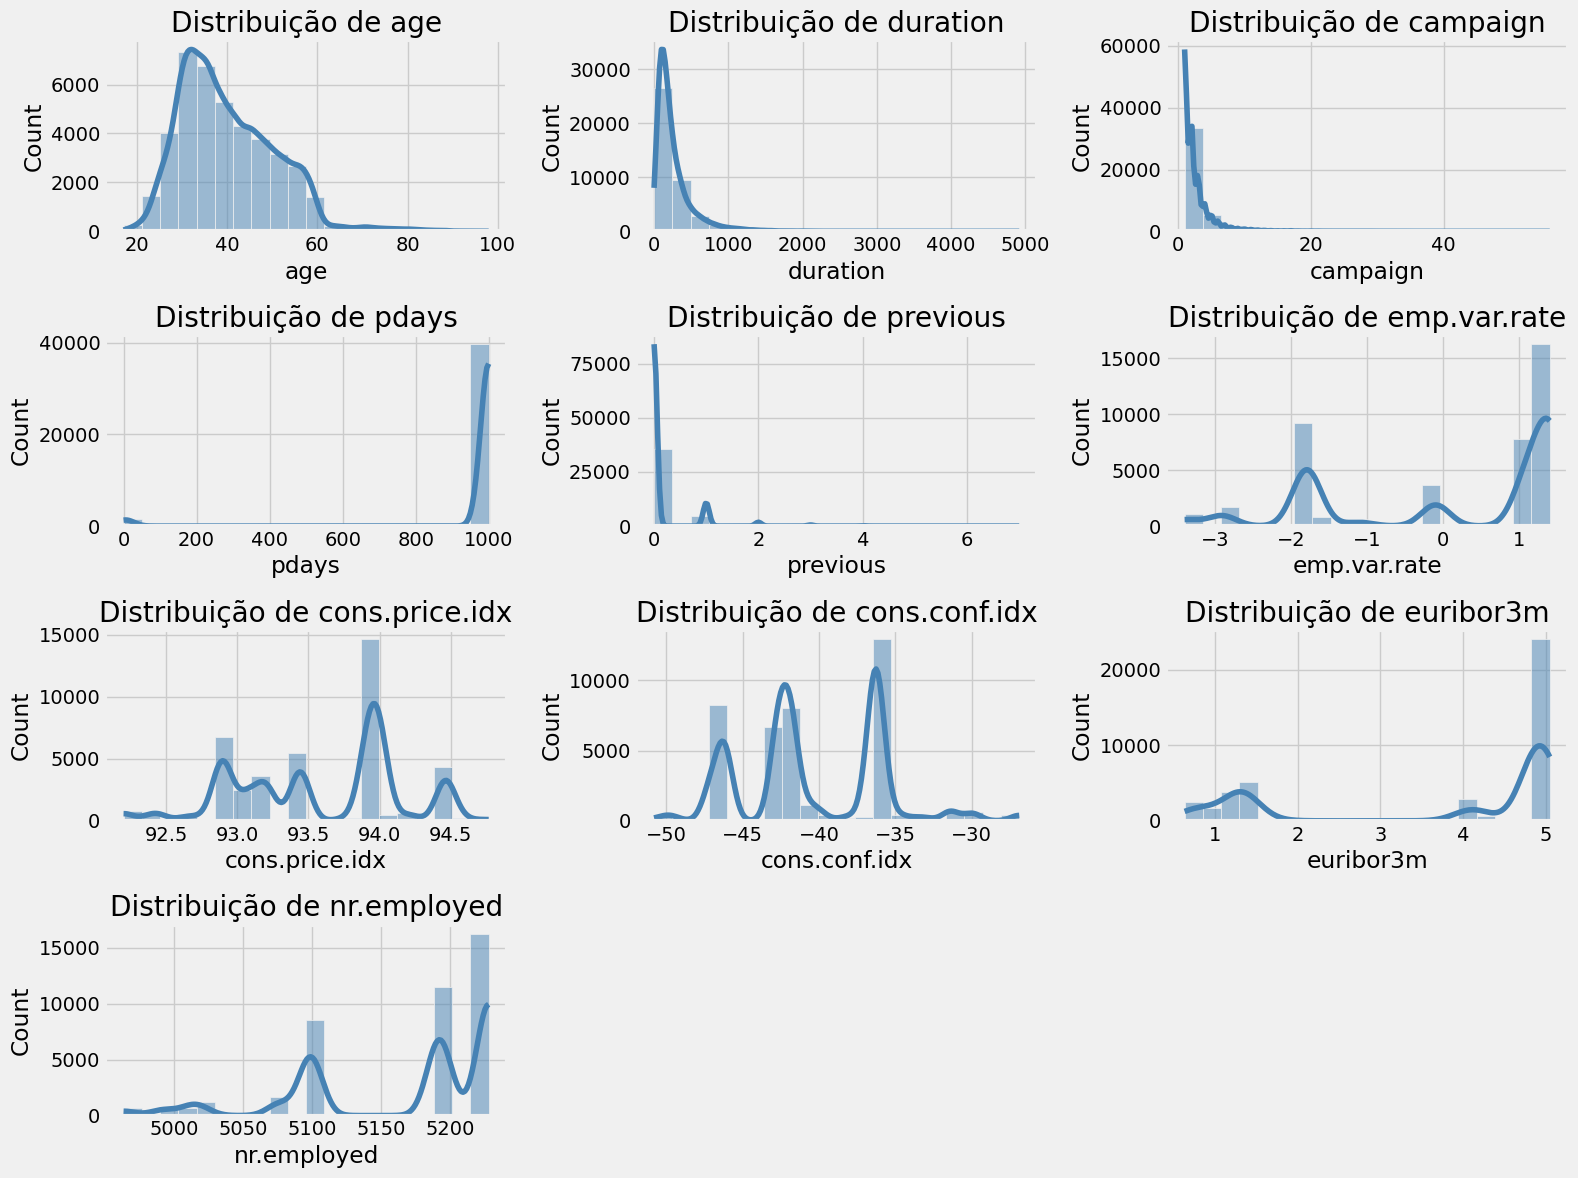

In [316]:
colx = 3
numero_features = len(num_cols)
n_rows = math.ceil(numero_features / colx)

plt.figure(figsize=(16, n_rows * 3))

for i, col in enumerate(num_cols, 1):
    plt.subplot(n_rows, colx, i)
    sns.histplot(df[col], kde=True, bins=20, color='steelblue')
    plt.title(f"Distribuição de {col}")
    plt.tight_layout()

plt.show()

### Check correlation between numerical variables

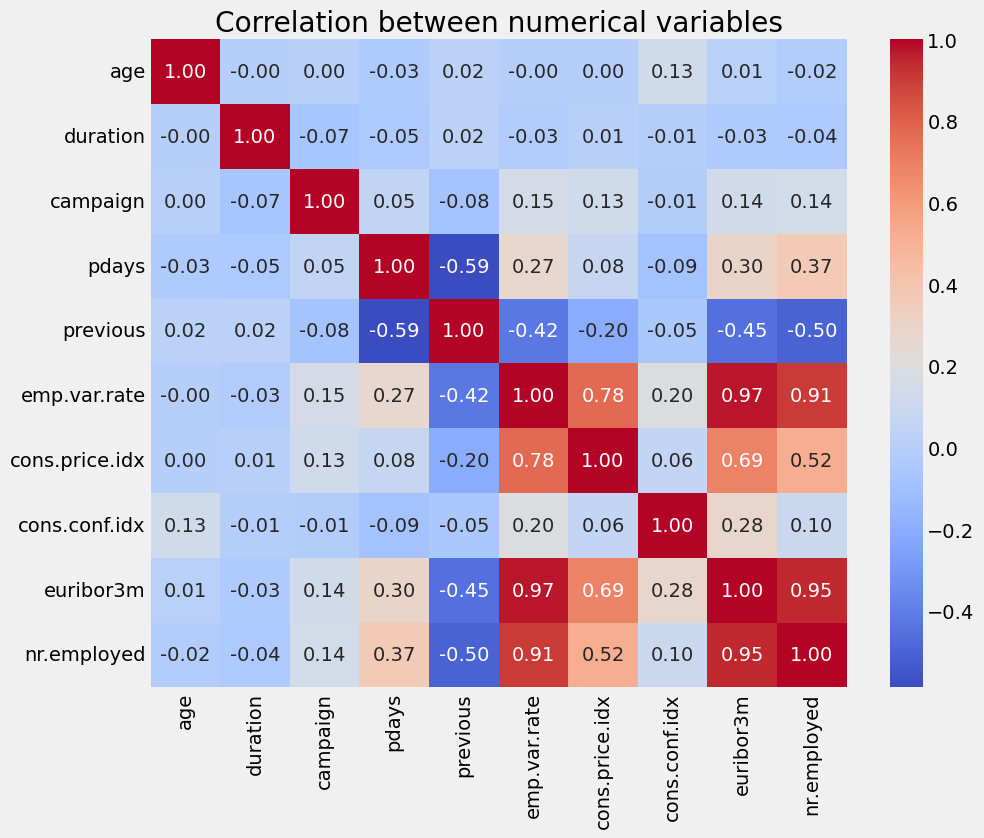

In [317]:
# Select numerical columns
num_cols = df.select_dtypes(include=['int64','float64']).columns

# Calculate correlation matrix
corr = df[num_cols].corr()

# Show heatmap of correlations
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation between numerical variables")
plt.show()

### Check correlation between categorical variables

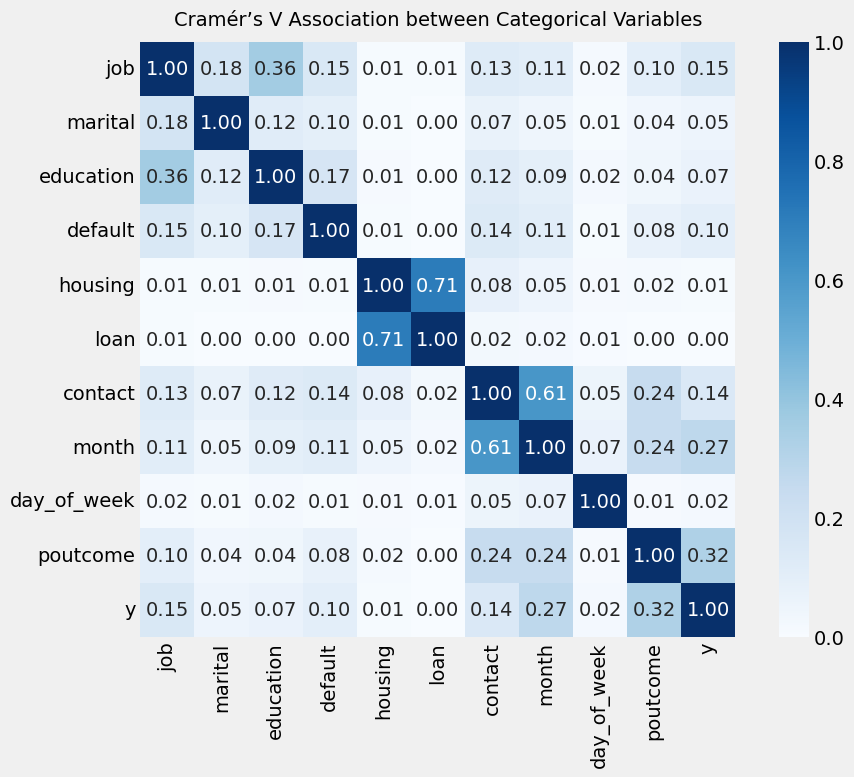

In [318]:
def cramers_v(x, y):
    """Compute Cramér's V statistic for categorical-categorical association."""
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix, correction=False)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1)) / (n-1))
    rcorr = r - ((r-1)**2) / (n-1)
    kcorr = k - ((k-1)**2) / (n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

cat_cols = df.select_dtypes(include='object').columns

cramers_results = pd.DataFrame(index=cat_cols, columns=cat_cols, dtype=float)

for c1 in cat_cols:
    for c2 in cat_cols:
        if c1 == c2:
            cramers_results.loc[c1, c2] = 1.0
        else:
            cramers_results.loc[c1, c2] = cramers_v(df[c1], df[c2])

plt.figure(figsize=(10, 8))
sns.heatmap(cramers_results, annot=True, cmap='Blues', fmt=".2f", square=True)
plt.title("Cramér’s V Association between Categorical Variables", fontsize=14, pad=12)
plt.tight_layout()
plt.show()

--------------------
## Descriptive statistics
--------------------

In [319]:
df.describe(include = 'number').T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [320]:
df.describe(include = 'object').T 

,count,unique,top,freq
job,41188,12,admin.,10422
marital,41188,4,married,24928
education,41188,8,university.degree,12168
default,41188,3,no,32588
housing,41188,3,yes,21576
loan,41188,3,no,33950
contact,41188,2,cellular,26144
month,41188,10,may,13769
day_of_week,41188,5,thu,8623
poutcome,41188,3,nonexistent,35563


### Class balance plot

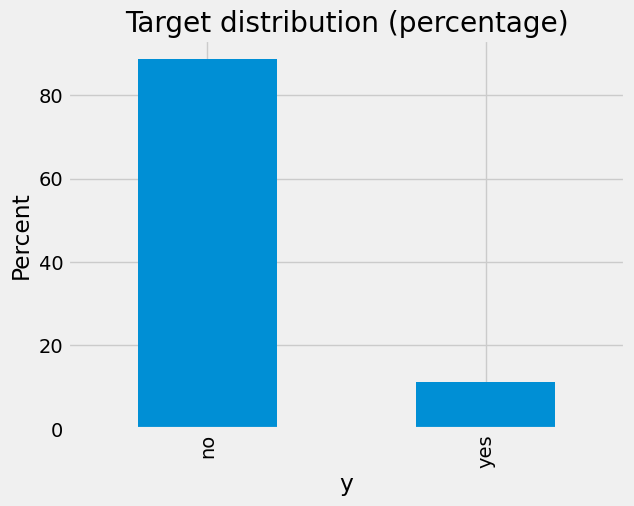

In [321]:
fig = plt.figure()
(df['y'].value_counts(normalize=True).sort_index()*100).plot(kind='bar')
plt.title('Target distribution (percentage)')
plt.ylabel('Percent')
plt.xlabel('y')
plt.show()

-------------------
# Data cleaning, feature selection
-------------------

### Dropping duplicated rows

In [322]:
df.drop_duplicates(inplace=True)
df.size

864696

### Dropping columns with high correlation

In [323]:
#df.drop(columns=['pdays', 'cons.price.idx', 'cons.conf.idx', 'nr.employed'], inplace=True)
df.drop(columns=['cons.price.idx', 'nr.employed', 'euribor3m'], inplace=True)
#df.drop(columns=['pdays','nr.employed', 'euribor3m'], inplace=True)
#df.drop(columns=['nr.employed', 'euribor3m'], inplace=True)
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.conf.idx', 'y'],
      dtype='object')

### Handling 'unknown' values and Missing Values

For categorical variables, missing or `'unknown'` entries were handled to ensure data quality and model interpretability:

- The variables **`education`** and **`default`** were **kept and modeled**, as the `'unknown'` category may contain predictive meaning (e.g., clients with unavailable credit history).  
  - Missing values in these columns were filled with `'unknown'` to maintain consistency.  
- For **`job`**, **`marital`**, **`housing`**, and **`loan`**, rows containing `'unknown'` values were **removed**, since their frequency was **very low (<3%)**, minimizing data loss while improving dataset reliability.  
- The numeric variable **`pdays`** had values of `999` — indicating no previous contact — replaced with `-1` to make this condition explicit for modeling.  

Finally, a summary table was created to display for each categorical feature:
- Data type  
- Number and percentage of `'unknown'` values  
- Total unique categories  

This helps evaluate the distribution of missing or undefined information across categorical variables.

In [324]:
df = df[df['housing'] != 'unknown']
df = df[df['loan'] != 'unknown']
df = df[df['job'] != 'unknown']
df = df[df['marital'] != 'unknown']
df['education'] = df['education'].fillna('unknown')
df['default'] = df['default'].fillna('unknown')
df['pdays'] = df['pdays'].replace(999, -1)

cat_cols = df.select_dtypes(include='object').columns
cat_info = pd.DataFrame({
    'Data Type': df[cat_cols].dtypes,
    'Unknown Count': [(df[c] == 'unknown').sum() for c in cat_cols],
    'Unknown (%)': [(df[c].eq('unknown').sum() / len(df)) * 100 for c in cat_cols],
    'Unique Values': [df[c].nunique() for c in cat_cols]
})

cat_info = cat_info.sort_values(by='Unknown Count', ascending=False)
cat_info.style.format({'Unknown (%)': '{:.2f}%'})


,Data Type,Unknown Count,Unknown (%),Unique Values
default,object,8212,20.64%,3
education,object,1557,3.91%,8
job,object,0,0.00%,11
marital,object,0,0.00%,3
housing,object,0,0.00%,2
loan,object,0,0.00%,2
contact,object,0,0.00%,2
month,object,0,0.00%,10
day_of_week,object,0,0.00%,5
poutcome,object,0,0.00%,3


### Categorical variable encoding

The categorical variables are converted into numeric form:
- **`education`** and **`month`** are ordinal, so they are mapped to ordered numeric codes.  
- Other categorical variables are nominal and are transformed using **one-hot encoding** (`pd.get_dummies()`), creating binary columns.  
- The target **`y`** is encoded with `LabelEncoder` (`no` = 0, `yes` = 1).

This ensures all variables are numeric and ready for model training.

In [325]:
edu_order = ['illiterate', 'basic.4y', 'basic.6y', 'basic.9y',
              'high.school', 'professional.course', 'university.degree', 'unknown']
month_order = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']

df['education'] = pd.Categorical(df['education'], categories=edu_order, ordered=True).codes
df['month'] = pd.Categorical(df['month'], categories=month_order, ordered=True).codes

nominal_cols = ['job', 'marital', 'default', 'housing', 'loan',
                'contact', 'day_of_week', 'poutcome']
dfML = df.copy()
dfML = pd.get_dummies(dfML, columns=nominal_cols, drop_first=True)


le = LabelEncoder()
df['y'] = le.fit_transform(df['y'])
dfML['y'] = le.fit_transform(dfML['y'])
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.conf.idx', 'y'],
      dtype='object')

### Scale numeric variables

In [326]:
# num_cols_scaled = ['age','campaign','pdays','previous','emp.var.rate','cons.price.idx',
#                    'cons.conf.idx']
# num_cols_scaled = ['age','campaign','previous','emp.var.rate','cons.price.idx',
#                     'cons.conf.idx']
num_cols_scaled = ['age','campaign','pdays','previous','cons.conf.idx','emp.var.rate',]
#num_cols_scaled = ['age','campaign','previous','emp.var.rate','euribor3m',]
scaler = StandardScaler()
df[num_cols_scaled] = scaler.fit_transform(df[num_cols_scaled])

### Columns dropping based on the set description

The column **`duration`** will be removed from the modeling dataset to avoid data leakage,  
but will be **saved separately** for later analysis and evaluation at the end of the project.

In [327]:
duration = df['duration'].copy()
df=df.drop(columns=['duration'])
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.conf.idx', 'y'],
      dtype='object')

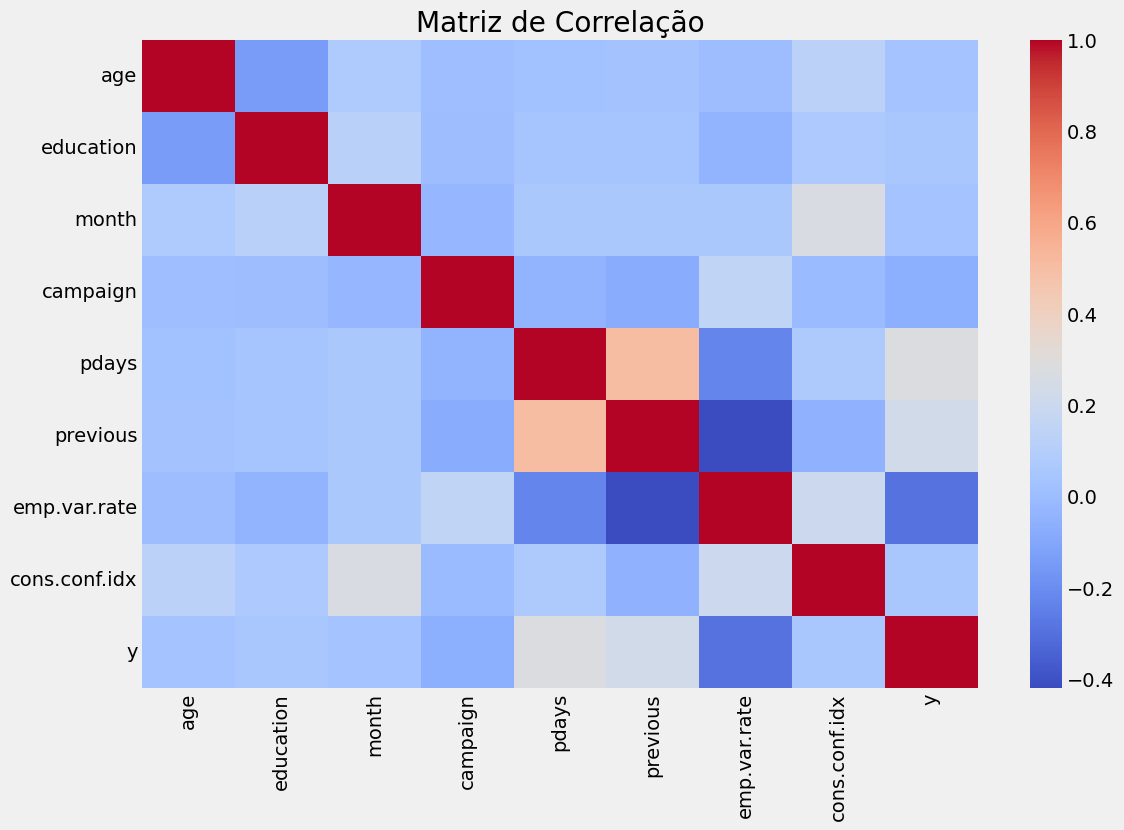

In [328]:
corr = df.corr(numeric_only=True)

plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title("Matriz de Correlação")
plt.show()

### Correlation between Features and Target (y)

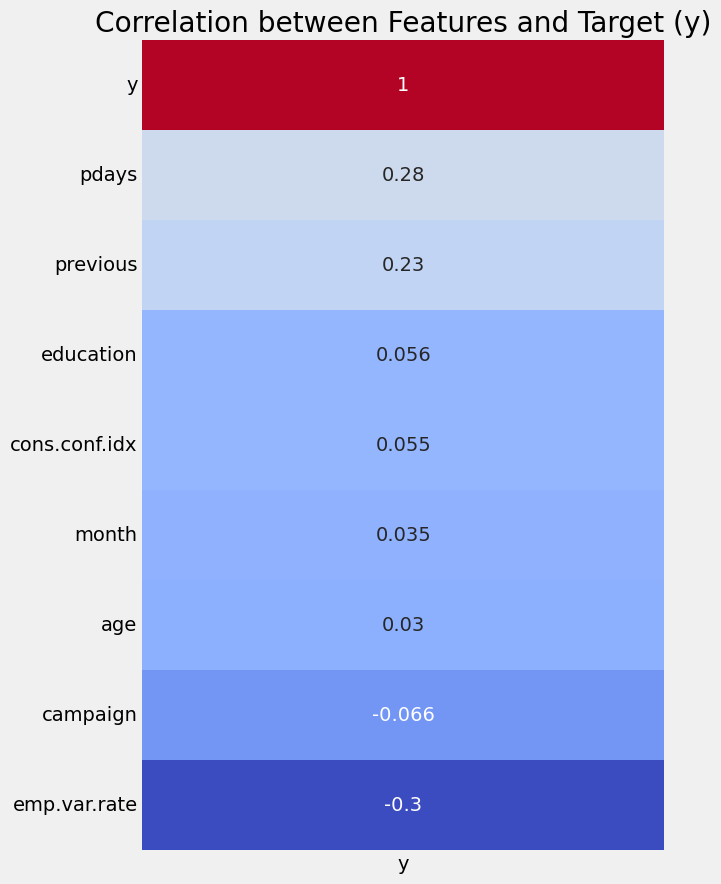

In [329]:
df_temp = df.drop(columns=['y']).copy()
df_temp['y'] = df['y']

corr_with_target = df_temp.corr(numeric_only=True)['y'].sort_values(ascending=False)

plt.figure(figsize=(6,10))
sns.heatmap(corr_with_target.to_frame(), annot=True, cmap="coolwarm", cbar=False)
plt.title("Correlation between Features and Target (y)")
plt.show()

###

### Train/Test Split and Cross-Validation

Experiment with different train/test splits (e.g., 70/30, 80/20, 90/10) to assess model robustness.
For a more reliable evaluation, use Stratified K-Fold Cross-Validation, which averages results across multiple partitions.

In [330]:
X = df.drop(columns=['y'])
y = df['y']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

train_df = X_train.copy()
train_df['y'] = y_train

test_df = X_test.copy()
test_df['y'] = y_test


X = dfML.drop(columns=['y'])
y = dfML['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

train_dfML = X_train.copy()
train_dfML['y'] = y_train

test_dfML = X_test.copy()
test_dfML['y'] = y_test

### Applying SMOTE to Balance the Training Data

Use the Synthetic Minority Over-sampling Technique (SMOTE) to generate synthetic samples of the minority class, ensuring a balanced training dataset and improving model fairness.

In [331]:
X_train = train_dfML.drop(columns=['y']).copy()
y_train = train_dfML['y']
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("\nOriginal train shape:", X_train.shape)
print("Resampled train shape:", X_train_res.shape)


Original train shape: (31832, 32)
Resampled train shape: (56486, 32)


In [332]:
model = LogisticRegression()
rfe = RFE(model, n_features_to_select=10)
rfe.fit(X, y)
print("Features selected:", X.columns[rfe.support_])

Features selected: Index(['previous', 'emp.var.rate', 'job_blue-collar', 'job_retired',
       'job_services', 'job_student', 'default_unknown', 'contact_telephone',
       'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')


### Interpretation of Feature Selection Methods

Three feature selection techniques were applied:
- **Chi-Square Test** for categorical variables,
- **ANOVA Test** for continuous variables, and
- **LASSO Regularization** for multivariate feature importance.

These methods confirmed which features have a statistically significant relationship with the target variable (`y`).
The goal was not only to reduce dimensionality, but also to validate the relevance and predictive strength of each feature.

A reduced dataset (**dfFS**) was then created containing only the significant variables.
This dataset was compared with the full model (**dfML**) to evaluate whether model simplicity
could be achieved without compromising predictive performance.

In [333]:
def FunctionChisq(inpData, TargetVariable, CategoricalVariablesList):


    FiltPredictors = []

    for predictor in CategoricalVariablesList:
        CrossTabResult = pd.crosstab(index=inpData[TargetVariable],
                                     columns=inpData[predictor])
        ChiSqResult = chi2_contingency(CrossTabResult)
        p_value = ChiSqResult[1]

        if p_value < 0.05:
            print(f"{predictor} IS correlated with {TargetVariable} | P-Value: {p_value:.4f}")
        else:
            print(f"{predictor} is NOT correlated with {TargetVariable} | P-Value: {p_value:.4f}")
            FiltPredictors.append(predictor)
            
    return FiltPredictors

In [334]:
categorical_vars = ['job', 'marital', 'education', 'default', 'housing',
                    'loan', 'contact', 'month', 'day_of_week', 'poutcome']

insignificant_vars = FunctionChisq(inpData=train_df, TargetVariable='y', CategoricalVariablesList=categorical_vars)

job IS correlated with y | P-Value: 0.0000
marital IS correlated with y | P-Value: 0.0000
education IS correlated with y | P-Value: 0.0000
default IS correlated with y | P-Value: 0.0000
housing IS correlated with y | P-Value: 0.0061
loan is NOT correlated with y | P-Value: 0.4043
contact IS correlated with y | P-Value: 0.0000
month IS correlated with y | P-Value: 0.0000
day_of_week IS correlated with y | P-Value: 0.0001
poutcome IS correlated with y | P-Value: 0.0000


### Continuous vs Categorical using ANOVA test

- **Assumption (H₀):** There is **no relationship** between the continuous predictor and the target variable.  
  In other words, the mean of the numeric variable is **the same across both classes** of the target (`y`).

- **Alternative (H₁):** There **is a relationship**, meaning that the mean values differ significantly between the groups of `y`.

The ANOVA test evaluates the probability that the null hypothesis (H₀) is true.  
If the **p-value < 0.05**, we reject H₀ and conclude that the variable is **significantly correlated** with the target.  
If the **p-value ≥ 0.05**, we fail to reject H₀, meaning there is **no significant difference** between the groups.

In [335]:
def FunctionAnova(inpData, TargetVariable, ContinuousPredictorList):
    FiltPredictors = []

    print('##### ANOVA Results #####\n')
    for predictor in ContinuousPredictorList:
        try:
            CategoryGroupLists = inpData.groupby(TargetVariable)[predictor].apply(list)
            AnovaResults = f_oneway(*CategoryGroupLists)

            p_value = AnovaResults[1]

            if p_value < 0.05:
                print(f"{predictor} IS correlated with {TargetVariable} | P-Value: {p_value:.4f}")
            else:
                print(f"{predictor} is NOT correlated with {TargetVariable} | P-Value: {p_value:.4f}")
                FiltPredictors.append(predictor)
        except Exception as e:
            print(f"⚠️ Could not test {predictor}: {e}")

    return FiltPredictors

In [336]:
# continuous_vars = [
#     'age', 'campaign', 'pdays','previous', 'emp.var.rate',
#     'cons.price.idx', 'cons.conf.idx'
# ]
# continuous_vars = [
#     'age', 'campaign', 'previous', 'emp.var.rate',
#     'cons.price.idx', 'cons.conf.idx'
# ]
continuous_vars = [
    'age', 'campaign','pdays', 'previous', 'emp.var.rate', 'cons.conf.idx',
]
# continuous_vars = [
#     'age', 'campaign', 'previous','euribor3m', 'emp.var.rate',
# ]
insignificant_continuous_vars = FunctionAnova(inpData=train_df, TargetVariable='y', ContinuousPredictorList=continuous_vars)

##### ANOVA Results #####

age IS correlated with y | P-Value: 0.0000
campaign IS correlated with y | P-Value: 0.0000
pdays IS correlated with y | P-Value: 0.0000
previous IS correlated with y | P-Value: 0.0000
emp.var.rate IS correlated with y | P-Value: 0.0000
cons.conf.idx IS correlated with y | P-Value: 0.0000


### **Feature Selection using LASSO Regularization**

- **Assumption (H₀):** All input variables contribute equally to the prediction of the target variable.  
  In other words, no feature can be removed without reducing model performance.

- **Alternative (H₁):** Some input variables are **not relevant**, and their contribution to the model can be effectively reduced to zero without harming predictive performance.

LASSO (Least Absolute Shrinkage and Selection Operator) is a regularization technique that penalizes the absolute magnitude of feature coefficients in a regression model. When the penalty term (λ) is applied, less important variables have their coefficients shrunk toward zero, effectively performing automatic feature selection.

In [337]:


def lasso_regularization(df):

    X = df.iloc[:,:-1].copy()          
    y = df.iloc[:,-1].copy() 
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    scaler = StandardScaler()
    scaler.fit(X_train)

    sel_ = SelectFromModel(LogisticRegression(C=0.5, penalty='l1', solver='liblinear', random_state=10))

    sel_.fit(scaler.transform(X_train), y_train)

    selected_feat = X_train.columns[(sel_.get_support())]
    
    print("Number of features which coefficient was shrank to zero: ", np.sum(sel_.estimator_.coef_ == 0))
    
    removed_feats = X_train.columns[(sel_.estimator_.coef_ == 0).ravel().tolist()]
    print('Removed features by Lasso: ',removed_feats) 

    return X_train.columns[(sel_.estimator_.coef_ != 0).ravel().tolist()]

In [338]:
selected_features = lasso_regularization(train_dfML)
print("Selected features:", selected_features)

Number of features which coefficient was shrank to zero:  2
Removed features by Lasso:  Index(['job_self-employed', 'marital_married'], dtype='object')
Selected features: Index(['age', 'education', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'emp.var.rate', 'cons.conf.idx', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'marital_single', 'default_unknown', 'default_yes', 'housing_yes',
       'loan_yes', 'contact_telephone', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed', 'poutcome_nonexistent',
       'poutcome_success'],
      dtype='object')


In [339]:
selected_categorical = [var for var in categorical_vars if var not in insignificant_vars]

selected_continuous = [var for var in continuous_vars if var not in insignificant_continuous_vars]

selected_all = list(set(list(selected_categorical) + 
                        list(selected_continuous) + 
                        list(selected_features)))

print(f"Total features selected: {len(selected_all)}")
print("Selected variables:\n", selected_all)
dfFS_cols = []

for col in selected_all:
    matched = [c for c in dfML.columns if col in c]
    dfFS_cols.extend(matched)

dfFS_cols = list(set(dfFS_cols + ['y']))

dfFS = dfML[dfFS_cols].copy()

print(f"\ndfFS created successfully with {len(dfFS.columns)-1} features.")
print("Shape:", dfFS.shape)

Total features selected: 37
Selected variables:
 ['default_yes', 'day_of_week', 'job_blue-collar', 'marital', 'job_student', 'job', 'job_housemaid', 'job_management', 'poutcome', 'education', 'previous', 'loan_yes', 'job_technician', 'housing_yes', 'day_of_week_mon', 'age', 'default', 'month', 'job_retired', 'default_unknown', 'campaign', 'contact_telephone', 'job_unemployed', 'pdays', 'job_services', 'job_entrepreneur', 'emp.var.rate', 'cons.conf.idx', 'marital_single', 'day_of_week_wed', 'housing', 'day_of_week_tue', 'poutcome_success', 'poutcome_nonexistent', 'contact', 'day_of_week_thu', 'duration']

dfFS created successfully with 32 features.
Shape: (39791, 33)


-------------------
# Modeling and tunning
-------------------

### Model Evaluation Function

This function evaluates a classifier’s performance across multiple **classification thresholds** (`0.3`, `0.5`, and `0.7`), providing a detailed analysis of how sensitivity and precision change with decision boundaries.

For each model:
- The classifier is trained using the training set.  
- Predicted probabilities (`predict_proba`) are used to compute **ROC-AUC** and generate the **ROC Curve**, visualizing the trade-off between the True Positive Rate and False Positive Rate.  
- For each threshold value:
  - Predicted classes are derived from probabilities (`y_proba >= threshold`).
  - **Precision**, **Recall**, **F1-score**, **Balanced Accuracy**, and **Matthews Correlation Coefficient (MCC)** are computed.  
  - A **confusion matrix** is plotted to visualize prediction outcomes (TP, FP, FN, TN).  

This unified evaluation approach enables a consistent and comprehensive comparison across multiple classification models, ensuring fair assessment of both overall performance (AUC) and class-level behavior under different thresholds.

In [340]:
def evaluate_model(model, X_train, y_train, X_test, y_test, thresholds=[0.3, 0.5, 0.7]):
    model.fit(X_train, y_train)
    
    y_proba = model.predict_proba(X_test)[:, 1]
    
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc_value = roc_auc_score(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{model.__class__.__name__} (AUC={auc_value:.3f})")
    plt.plot([0,1],[0,1],'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

    for thr in thresholds:
        print(f"\n--- Threshold = {thr} ---")
        y_pred = (y_proba >= thr).astype(int)
        
        print(classification_report(y_test, y_pred))
        print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred))
        print("Matthews Corr. Coefficient (MCC):", matthews_corrcoef(y_test, y_pred))
        print("AUC:", auc_value)
        
        cm = confusion_matrix(y_test, y_pred)
        disp = ConfusionMatrixDisplay(cm)
        disp.plot(cmap='Blues')
        plt.title(f'Confusion Matrix (Threshold = {thr})')
        plt.show()

-------------------
# Model Training and Evaluation
-------------------

Train and evaluate multiple machine learning models — **Random Forest**, **Logistic Regression**, **Decision Tree**, **K-Nearest Neighbours (KNN)**, **Naïve Bayes**, **XGBoost**, **LightGBM**, and **Multi-Layer Perceptron (MLP Neural Network)** — using the same balanced training dataset.

Each model is assessed based on **cross-validation ROC-AUC performance** and **test-set evaluation metrics**, including:

- **Precision**
- **Recall**
- **F1-Score**
- **Balanced Accuracy**
- **ROC-AUC**
- **Matthews Correlation Coefficient (MCC)**

The results are compared to identify which classifier provides the best trade-off between **sensitivity and specificity**, as well as overall **robustness** on the minority class.

Ensemble and deep learning models such as **XGBoost**, **LightGBM**, and **MLP** are further validated using **5-fold Stratified Cross-Validation** to ensure **consistency** and **generalisation** across folds.


--- RANDOM FOREST ---


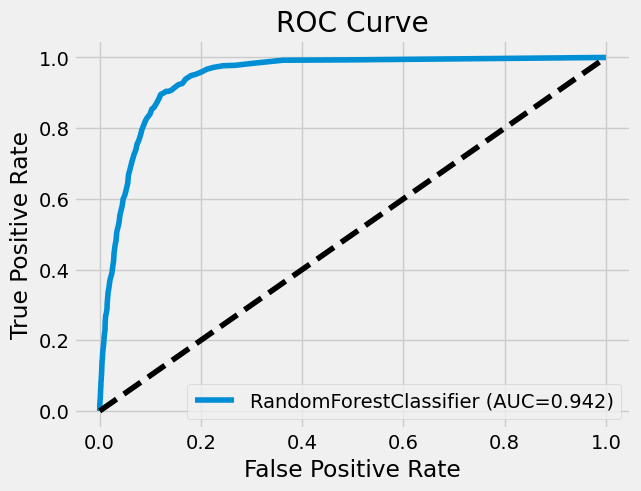


--- Threshold = 0.3 ---
              precision    recall  f1-score   support

           0       0.97      0.92      0.94      7062
           1       0.55      0.79      0.65       897

    accuracy                           0.90      7959
   macro avg       0.76      0.86      0.80      7959
weighted avg       0.92      0.90      0.91      7959

Balanced Accuracy: 0.8558754329782368
Matthews Corr. Coefficient (MCC): 0.60885222678529
AUC: 0.942441796769306


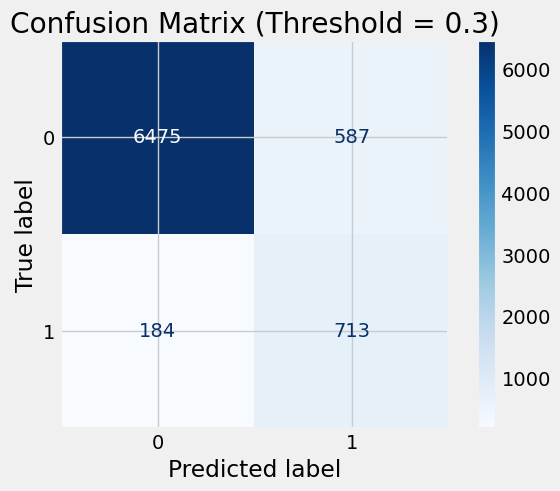


--- Threshold = 0.5 ---
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      7062
           1       0.66      0.51      0.57       897

    accuracy                           0.91      7959
   macro avg       0.80      0.74      0.76      7959
weighted avg       0.91      0.91      0.91      7959

Balanced Accuracy: 0.7357284121810737
Matthews Corr. Coefficient (MCC): 0.5298343671035536
AUC: 0.942441796769306


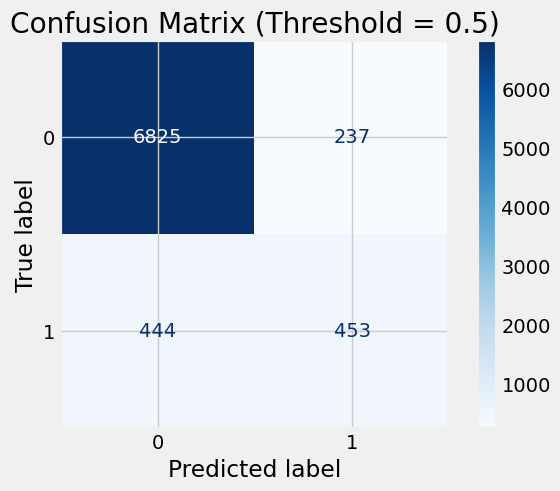


--- Threshold = 0.7 ---
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      7062
           1       0.75      0.21      0.33       897

    accuracy                           0.90      7959
   macro avg       0.83      0.60      0.64      7959
weighted avg       0.89      0.90      0.88      7959

Balanced Accuracy: 0.5993600399329778
Matthews Corr. Coefficient (MCC): 0.3623846922909243
AUC: 0.942441796769306


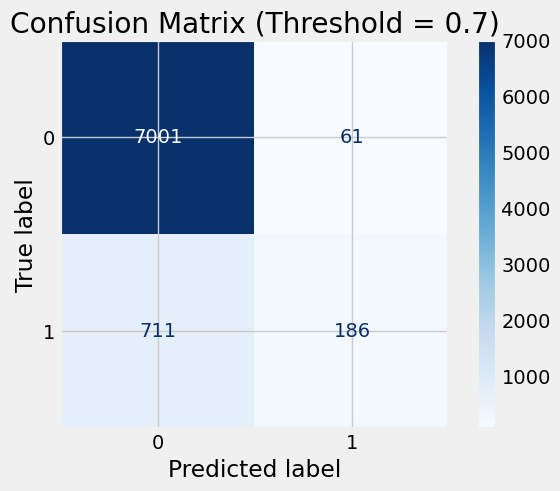

ROC-AUC CV: 0.9370 ± 0.0042

--- LOGISTIC REGRESSION ---


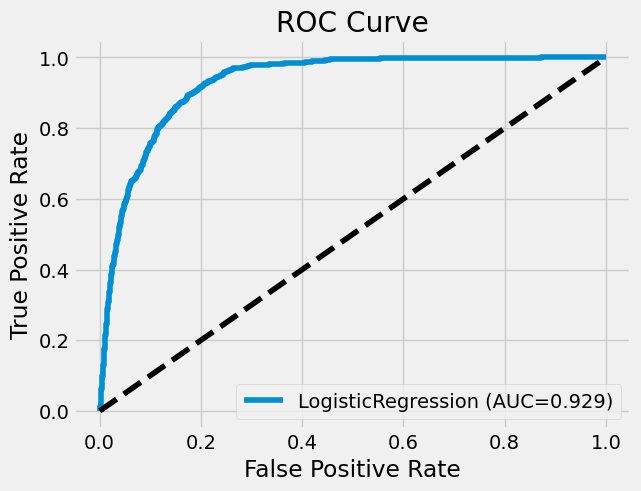


--- Threshold = 0.3 ---
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      7062
           1       0.60      0.59      0.59       897

    accuracy                           0.91      7959
   macro avg       0.77      0.77      0.77      7959
weighted avg       0.91      0.91      0.91      7959

Balanced Accuracy: 0.7700114797839299
Matthews Corr. Coefficient (MCC): 0.5421403294996321
AUC: 0.9288959043124017


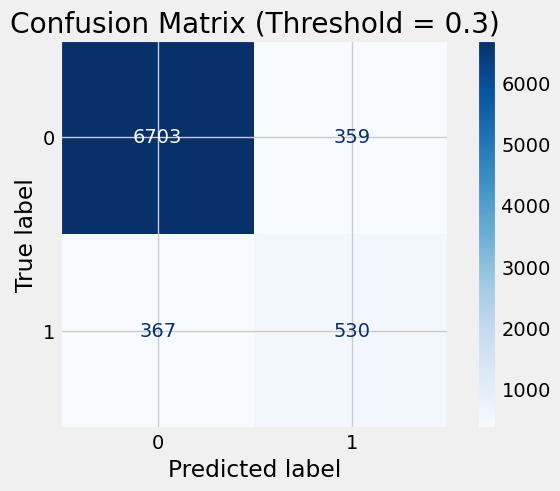


--- Threshold = 0.5 ---
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      7062
           1       0.68      0.40      0.50       897

    accuracy                           0.91      7959
   macro avg       0.80      0.69      0.73      7959
weighted avg       0.90      0.91      0.90      7959

Balanced Accuracy: 0.6864737930361661
Matthews Corr. Coefficient (MCC): 0.4751349183836952
AUC: 0.9288959043124017


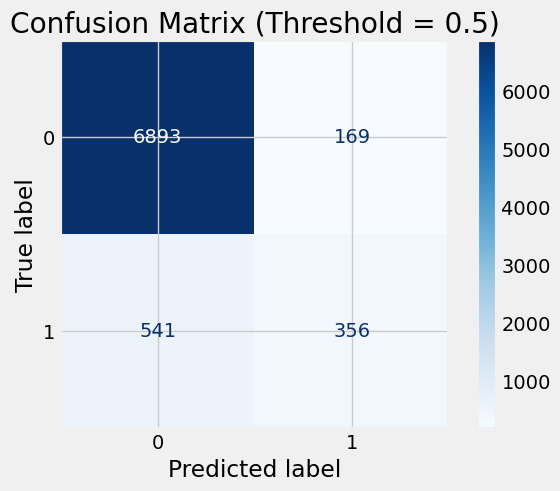


--- Threshold = 0.7 ---
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      7062
           1       0.71      0.22      0.34       897

    accuracy                           0.90      7959
   macro avg       0.81      0.61      0.64      7959
weighted avg       0.89      0.90      0.88      7959

Balanced Accuracy: 0.6057478008920512
Matthews Corr. Coefficient (MCC): 0.36239667520564944
AUC: 0.9288959043124017


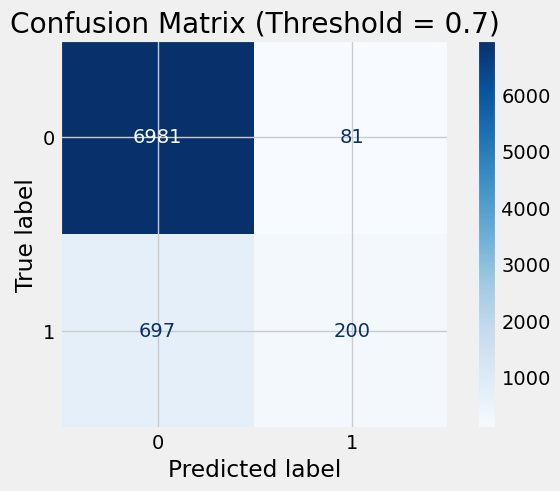


--- DECISION TREE ---


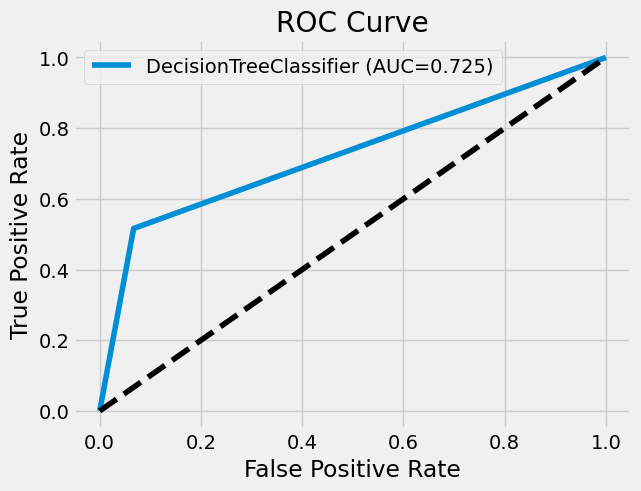


--- Threshold = 0.3 ---
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      7062
           1       0.49      0.52      0.51       897

    accuracy                           0.89      7959
   macro avg       0.72      0.72      0.72      7959
weighted avg       0.89      0.89      0.89      7959

Balanced Accuracy: 0.7245934006397232
Matthews Corr. Coefficient (MCC): 0.44094843565662967
AUC: 0.7245934006397233


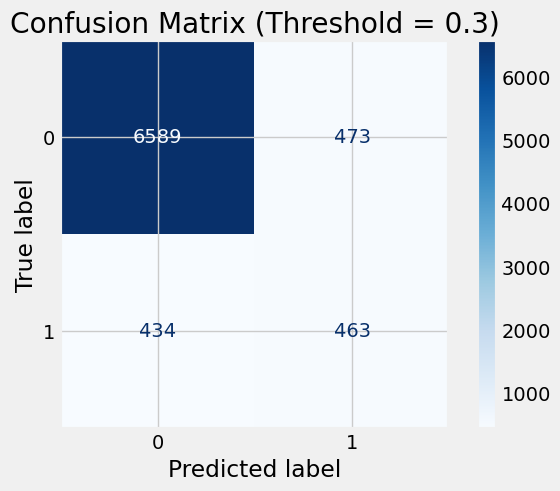


--- Threshold = 0.5 ---
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      7062
           1       0.49      0.52      0.51       897

    accuracy                           0.89      7959
   macro avg       0.72      0.72      0.72      7959
weighted avg       0.89      0.89      0.89      7959

Balanced Accuracy: 0.7245934006397232
Matthews Corr. Coefficient (MCC): 0.44094843565662967
AUC: 0.7245934006397233


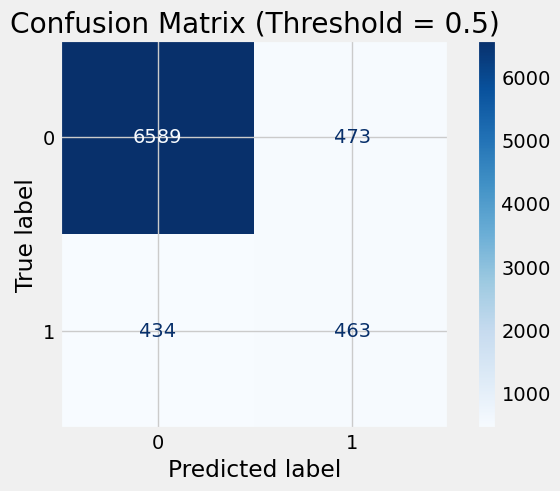


--- Threshold = 0.7 ---
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      7062
           1       0.49      0.52      0.51       897

    accuracy                           0.89      7959
   macro avg       0.72      0.72      0.72      7959
weighted avg       0.89      0.89      0.89      7959

Balanced Accuracy: 0.7245934006397232
Matthews Corr. Coefficient (MCC): 0.44094843565662967
AUC: 0.7245934006397233


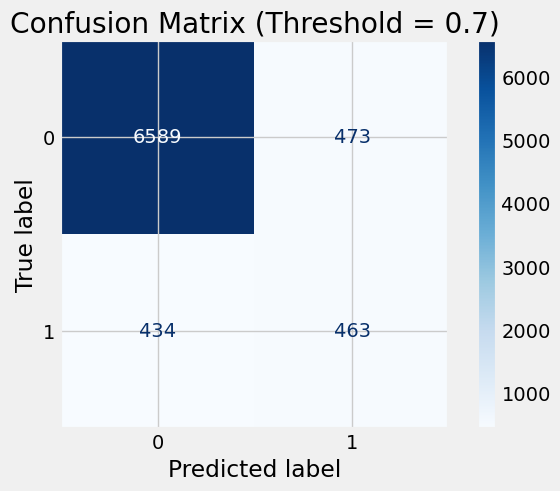


--- K-NEAREST NEIGHBOURS (KNN) ---


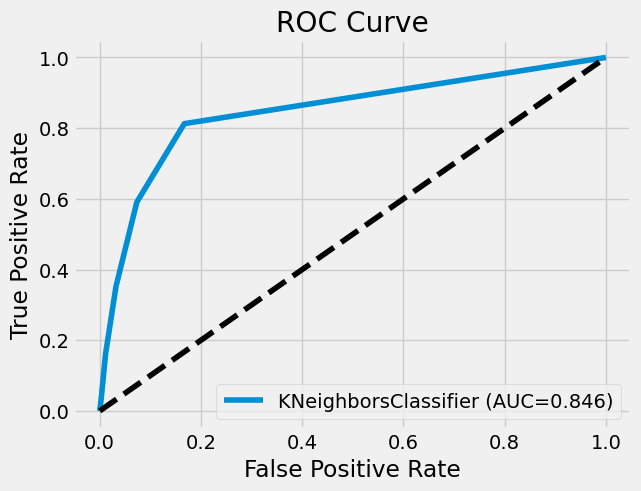


--- Threshold = 0.3 ---
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      7062
           1       0.51      0.59      0.54       897

    accuracy                           0.89      7959
   macro avg       0.73      0.76      0.74      7959
weighted avg       0.90      0.89      0.89      7959

Balanced Accuracy: 0.7587540456292996
Matthews Corr. Coefficient (MCC): 0.4839785730055583
AUC: 0.8463143926370258


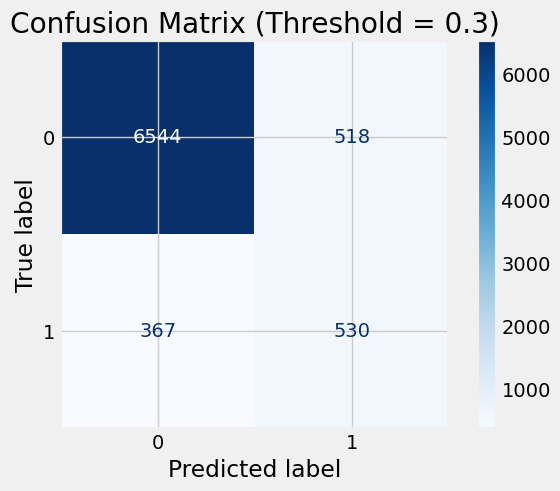


--- Threshold = 0.5 ---
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7062
           1       0.58      0.35      0.44       897

    accuracy                           0.90      7959
   macro avg       0.75      0.66      0.69      7959
weighted avg       0.88      0.90      0.89      7959

Balanced Accuracy: 0.6600707635855949
Matthews Corr. Coefficient (MCC): 0.4015293678789249
AUC: 0.8463143926370258


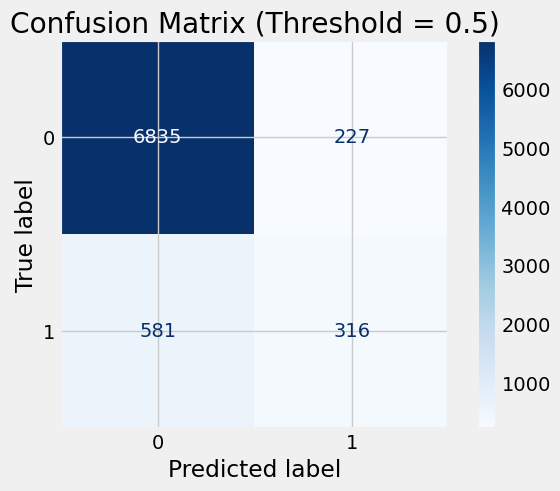


--- Threshold = 0.7 ---
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7062
           1       0.64      0.16      0.26       897

    accuracy                           0.90      7959
   macro avg       0.77      0.57      0.60      7959
weighted avg       0.87      0.90      0.87      7959

Balanced Accuracy: 0.574532639242107
Matthews Corr. Coefficient (MCC): 0.28440893166365344
AUC: 0.8463143926370258


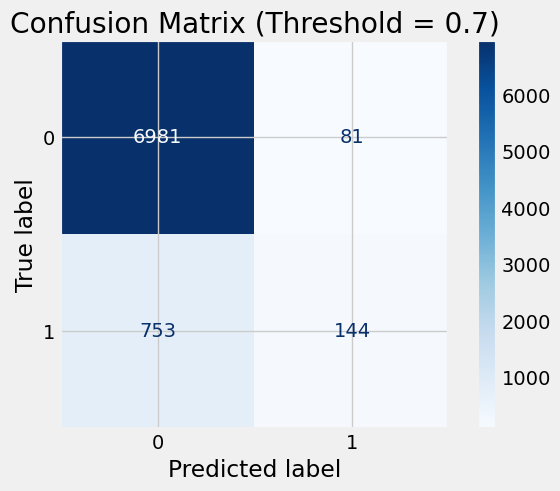


--- NAIVE BAYES ---


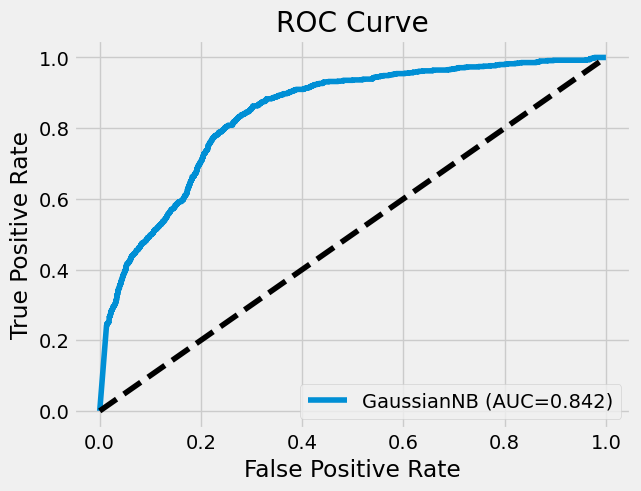


--- Threshold = 0.3 ---
              precision    recall  f1-score   support

           0       0.94      0.88      0.91      7062
           1       0.36      0.53      0.43       897

    accuracy                           0.84      7959
   macro avg       0.65      0.70      0.67      7959
weighted avg       0.87      0.84      0.85      7959

Balanced Accuracy: 0.7039001902878376
Matthews Corr. Coefficient (MCC): 0.34702869075310944
AUC: 0.8419569842771792


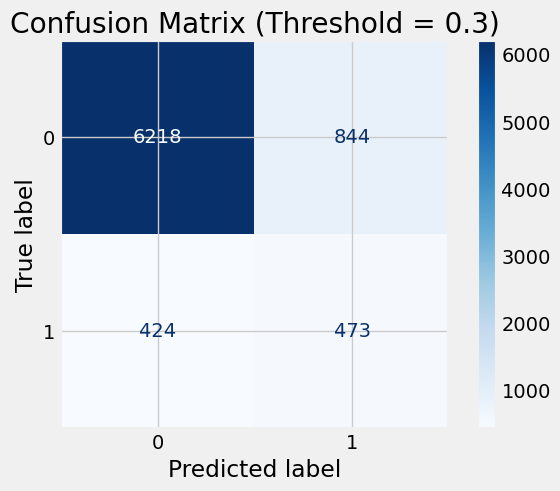


--- Threshold = 0.5 ---
              precision    recall  f1-score   support

           0       0.93      0.90      0.92      7062
           1       0.39      0.49      0.44       897

    accuracy                           0.86      7959
   macro avg       0.66      0.70      0.68      7959
weighted avg       0.87      0.86      0.86      7959

Balanced Accuracy: 0.697258585921731
Matthews Corr. Coefficient (MCC): 0.3590420313105158
AUC: 0.8419569842771792


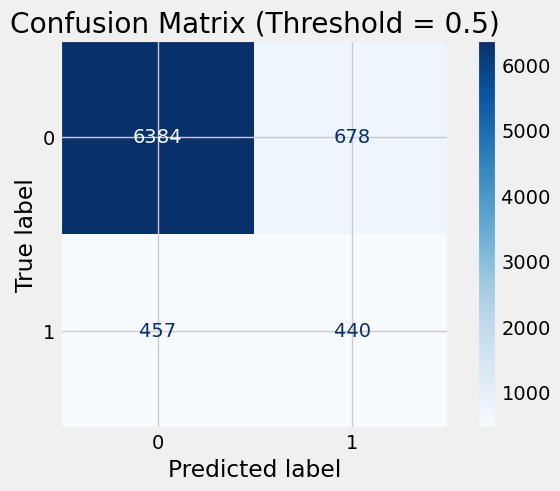


--- Threshold = 0.7 ---
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      7062
           1       0.43      0.46      0.44       897

    accuracy                           0.87      7959
   macro avg       0.68      0.69      0.68      7959
weighted avg       0.87      0.87      0.87      7959

Balanced Accuracy: 0.6921644318027902
Matthews Corr. Coefficient (MCC): 0.37036153534999344
AUC: 0.8419569842771792


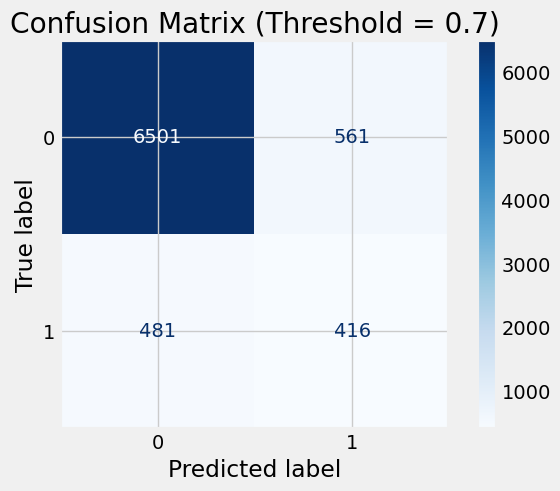


--- XGBOOST ---


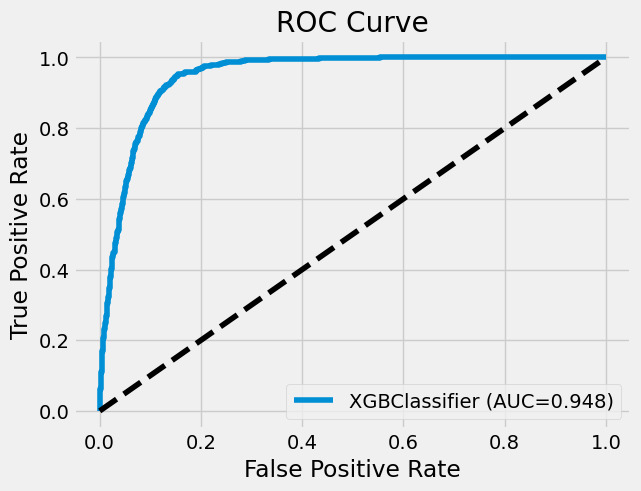


--- Threshold = 0.3 ---
              precision    recall  f1-score   support

           0       0.97      0.93      0.95      7062
           1       0.57      0.76      0.65       897

    accuracy                           0.91      7959
   macro avg       0.77      0.84      0.80      7959
weighted avg       0.92      0.91      0.91      7959

Balanced Accuracy: 0.8441709313306225
Matthews Corr. Coefficient (MCC): 0.6066619262089537
AUC: 0.9479909904534041


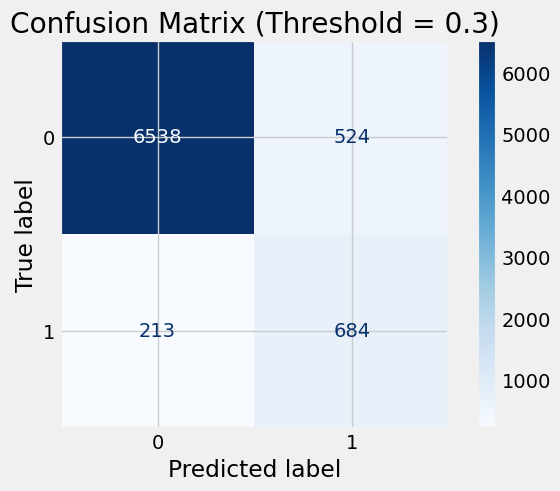


--- Threshold = 0.5 ---
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7062
           1       0.64      0.53      0.58       897

    accuracy                           0.91      7959
   macro avg       0.79      0.75      0.77      7959
weighted avg       0.91      0.91      0.91      7959

Balanced Accuracy: 0.7468406914770181
Matthews Corr. Coefficient (MCC): 0.5356479514302491
AUC: 0.9479909904534041


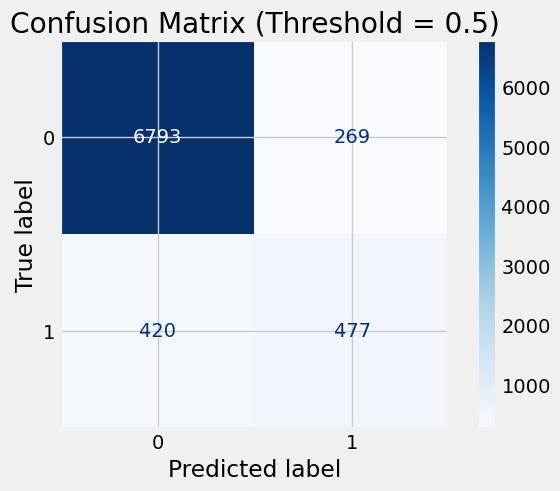


--- Threshold = 0.7 ---
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      7062
           1       0.72      0.30      0.42       897

    accuracy                           0.91      7959
   macro avg       0.82      0.64      0.69      7959
weighted avg       0.90      0.91      0.89      7959

Balanced Accuracy: 0.6410502676248309
Matthews Corr. Coefficient (MCC): 0.4248059424136062
AUC: 0.9479909904534041


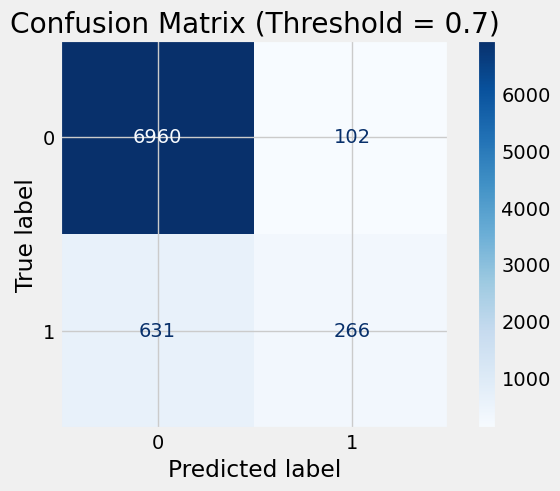


--- LIGHTGBM ---
[LightGBM] [Info] Number of positive: 3589, number of negative: 28243
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007632 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 499
[LightGBM] [Info] Number of data points in the train set: 31832, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112748 -> initscore=-2.062972
[LightGBM] [Info] Start training from score -2.062972


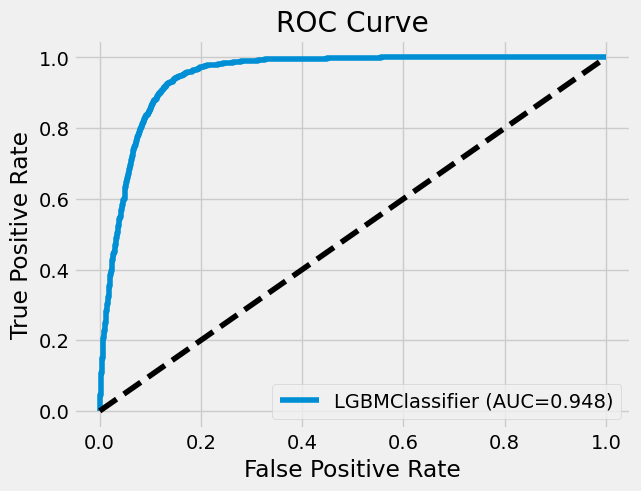


--- Threshold = 0.3 ---
              precision    recall  f1-score   support

           0       0.97      0.93      0.95      7062
           1       0.57      0.77      0.66       897

    accuracy                           0.91      7959
   macro avg       0.77      0.85      0.80      7959
weighted avg       0.92      0.91      0.91      7959

Balanced Accuracy: 0.8478694202993269
Matthews Corr. Coefficient (MCC): 0.6129729225430062
AUC: 0.9480339291391708


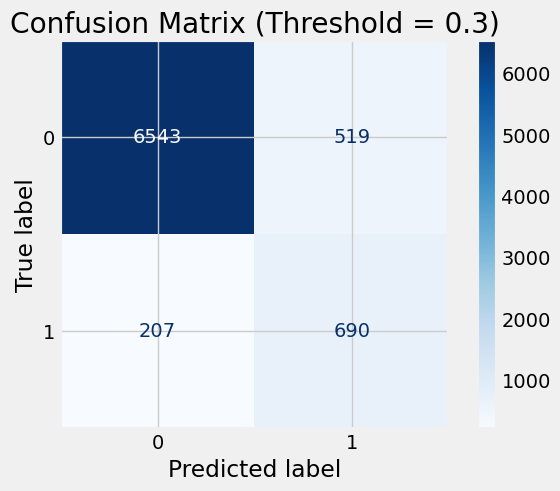


--- Threshold = 0.5 ---
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7062
           1       0.64      0.53      0.58       897

    accuracy                           0.91      7959
   macro avg       0.79      0.75      0.77      7959
weighted avg       0.91      0.91      0.91      7959

Balanced Accuracy: 0.74739810507791
Matthews Corr. Coefficient (MCC): 0.5365352779760028
AUC: 0.9480339291391708


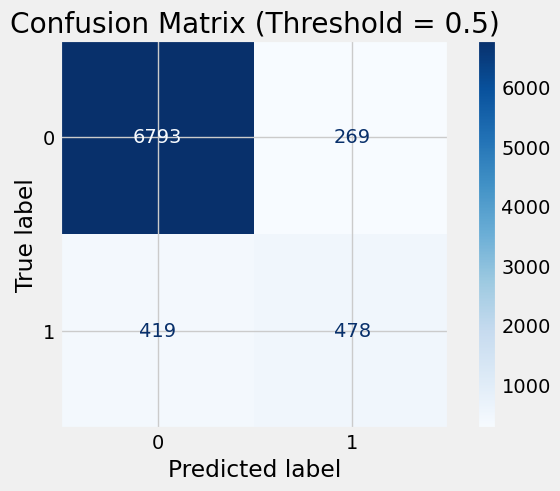


--- Threshold = 0.7 ---
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      7062
           1       0.73      0.28      0.40       897

    accuracy                           0.91      7959
   macro avg       0.82      0.63      0.68      7959
weighted avg       0.89      0.91      0.89      7959

Balanced Accuracy: 0.6332554753928179
Matthews Corr. Coefficient (MCC): 0.4138654314485087
AUC: 0.9480339291391708


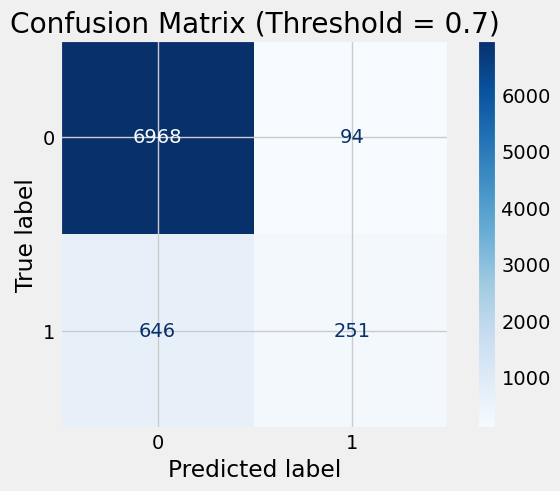


--- MLP (Neural Network) ---


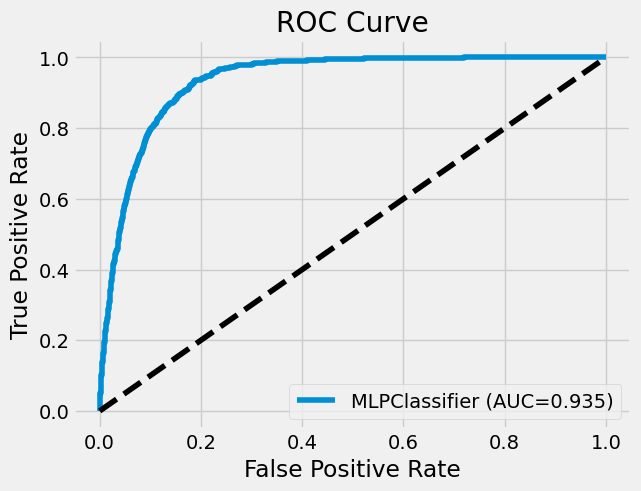


--- Threshold = 0.3 ---
              precision    recall  f1-score   support

           0       0.96      0.92      0.94      7062
           1       0.53      0.73      0.61       897

    accuracy                           0.90      7959
   macro avg       0.75      0.82      0.78      7959
weighted avg       0.91      0.90      0.90      7959

Balanced Accuracy: 0.8231386316514313
Matthews Corr. Coefficient (MCC): 0.5653939220383456
AUC: 0.9352973993364079


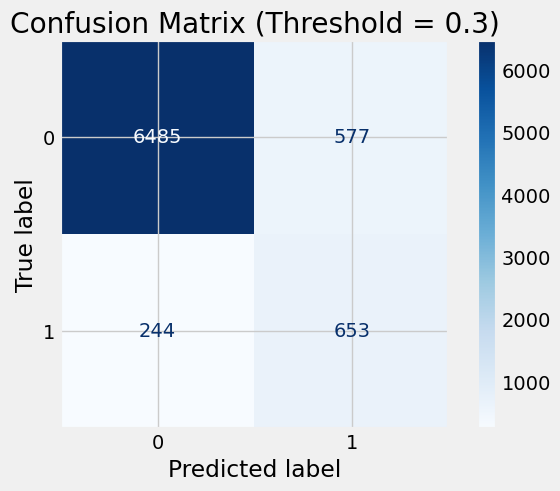


--- Threshold = 0.5 ---
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7062
           1       0.62      0.52      0.57       897

    accuracy                           0.91      7959
   macro avg       0.78      0.74      0.76      7959
weighted avg       0.90      0.91      0.91      7959

Balanced Accuracy: 0.7406821473257881
Matthews Corr. Coefficient (MCC): 0.5173455458476368
AUC: 0.9352973993364079


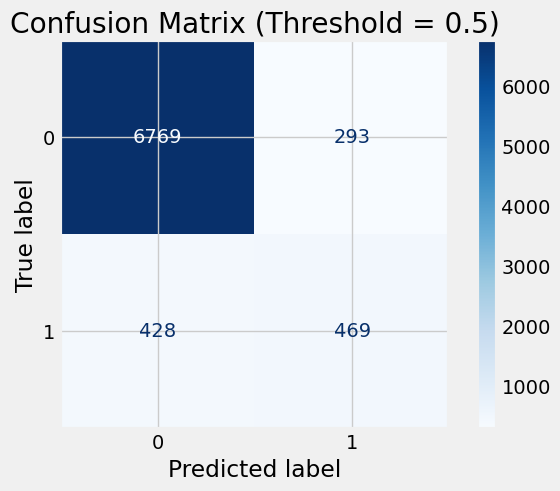


--- Threshold = 0.7 ---
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7062
           1       0.67      0.30      0.41       897

    accuracy                           0.90      7959
   macro avg       0.79      0.64      0.68      7959
weighted avg       0.89      0.90      0.89      7959

Balanced Accuracy: 0.6409434734302675
Matthews Corr. Coefficient (MCC): 0.4056197023795141
AUC: 0.9352973993364079


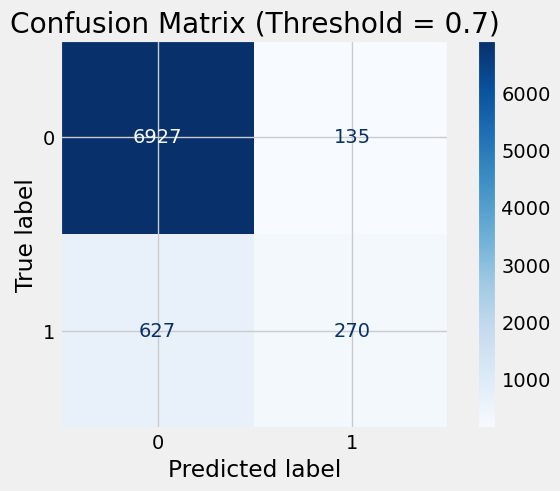

XGB | ROC-AUC CV: 0.9436 ± 0.0019
LGBM | ROC-AUC CV: 0.9432 ± 0.0019
MLP | ROC-AUC CV: 0.9205 ± 0.0043


In [341]:
print("\n--- RANDOM FOREST ---")
rf_model = RandomForestClassifier(random_state=42)

evaluate_model(rf_model, X_train, y_train, X_test, y_test)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(rf_model, X_train, y_train, cv=cv, scoring='roc_auc', n_jobs=-1)
print(f"ROC-AUC CV: {scores.mean():.4f} ± {scores.std():.4f}")


print("\n--- LOGISTIC REGRESSION ---")
lr_model = LogisticRegression(max_iter=1000)
evaluate_model(lr_model, X_train, y_train, X_test, y_test)

print("\n--- DECISION TREE ---")
dt_model = DecisionTreeClassifier(
    criterion='gini', 
    max_depth=None, 
    min_samples_split=2, 
    random_state=42
)
evaluate_model(dt_model, X_train, y_train, X_test, y_test)

print("\n--- K-NEAREST NEIGHBOURS (KNN) ---")
knn_model = KNeighborsClassifier(
    n_neighbors=5,  
    metric='minkowski', 
    p=2             
)
evaluate_model(knn_model, X_train, y_train, X_test, y_test)

print("\n--- NAIVE BAYES ---")
nb_model = GaussianNB()
evaluate_model(nb_model, X_train, y_train, X_test, y_test)

print("\n--- XGBOOST ---")
xgb_model = XGBClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_lambda=1.0,
    tree_method="hist",
    eval_metric="logloss",
    n_jobs=-1,
    random_state=42
)

evaluate_model(xgb_model, X_train, y_train, X_test, y_test)

print("\n--- LIGHTGBM ---")
lgbm_model = LGBMClassifier(
    n_estimators=700,
    learning_rate=0.05,
    num_leaves=31,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_lambda=1.0,
    random_state=42,
    n_jobs=-1
)

evaluate_model(lgbm_model, X_train, y_train, X_test, y_test)

print("\n--- MLP (Neural Network) ---")
mlp_model = MLPClassifier(
    hidden_layer_sizes=(128, 64),
    activation="relu",
    solver="adam",
    learning_rate_init=1e-3,
    alpha=1e-4,              
    batch_size=256,
    max_iter=100,
    early_stopping=True,
    n_iter_no_change=10,
    random_state=42
)

evaluate_model(mlp_model, X_train, y_train, X_test, y_test)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, mdl in [
    ("XGB", xgb_model),
    ("LGBM", lgbm_model),
    ("MLP", mlp_model)
]:
    scores = cross_val_score(mdl, X_train, y_train, cv=cv, scoring="roc_auc", n_jobs=-1)
    print(f"{name} | ROC-AUC CV: {scores.mean():.4f} ± {scores.std():.4f}")



--- RANDOM FOREST ---


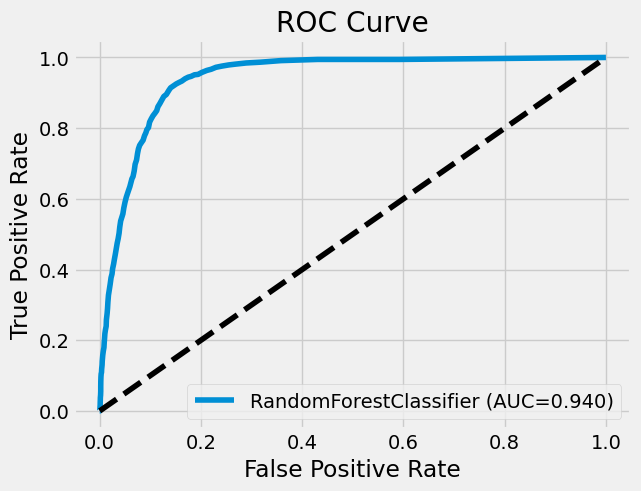


--- Threshold = 0.3 ---
              precision    recall  f1-score   support

           0       0.98      0.89      0.93      7062
           1       0.49      0.84      0.62       897

    accuracy                           0.89      7959
   macro avg       0.74      0.87      0.78      7959
weighted avg       0.92      0.89      0.90      7959

Balanced Accuracy: 0.8667459453725199
Matthews Corr. Coefficient (MCC): 0.5889175043421234
AUC: 0.9395379102815105


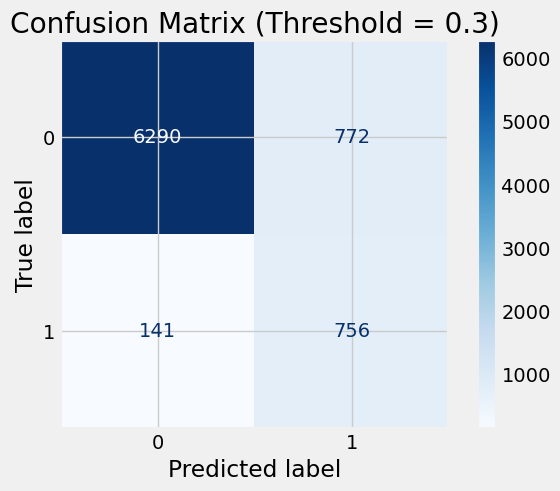


--- Threshold = 0.5 ---
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      7062
           1       0.59      0.62      0.60       897

    accuracy                           0.91      7959
   macro avg       0.77      0.78      0.77      7959
weighted avg       0.91      0.91      0.91      7959

Balanced Accuracy: 0.7802213362961027
Matthews Corr. Coefficient (MCC): 0.5491484037731045
AUC: 0.9395379102815105


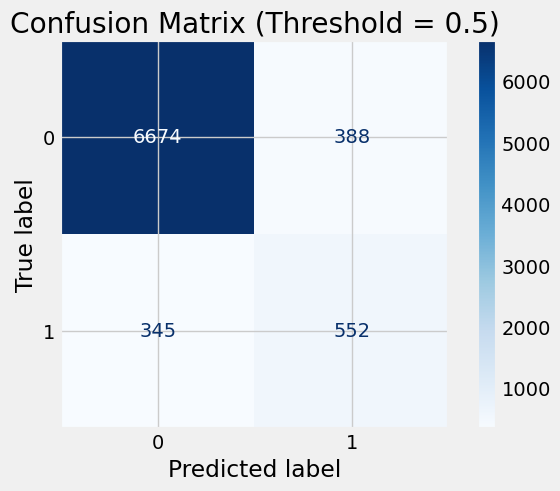


--- Threshold = 0.7 ---
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7062
           1       0.71      0.33      0.45       897

    accuracy                           0.91      7959
   macro avg       0.81      0.66      0.70      7959
weighted avg       0.90      0.91      0.89      7959

Balanced Accuracy: 0.6552418189963903
Matthews Corr. Coefficient (MCC): 0.4411436959487435
AUC: 0.9395379102815105


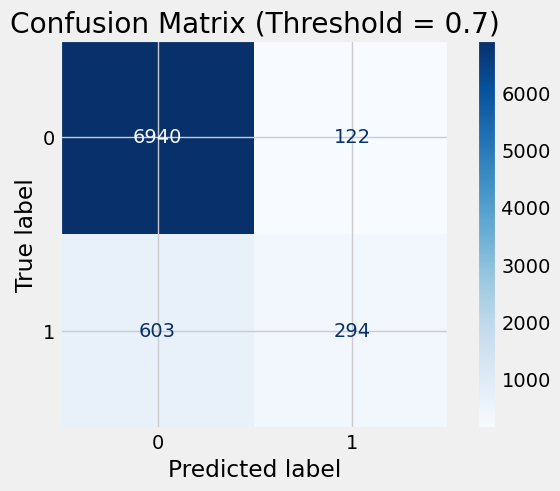

ROC-AUC CV: 0.9931 ± 0.0003

--- LOGISTIC REGRESSION ---


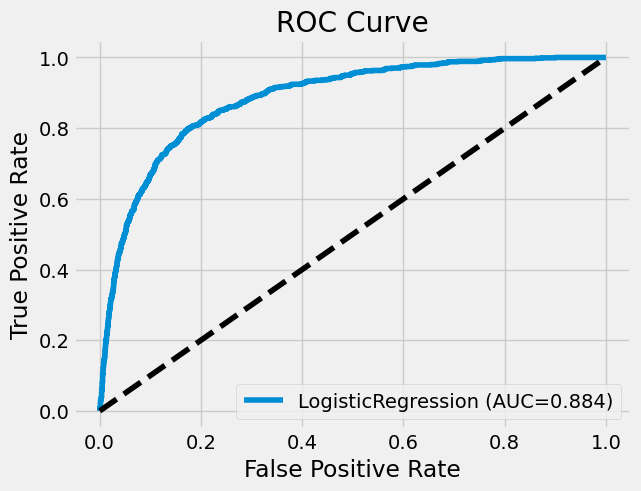


--- Threshold = 0.3 ---
              precision    recall  f1-score   support

           0       0.96      0.85      0.91      7062
           1       0.40      0.75      0.52       897

    accuracy                           0.84      7959
   macro avg       0.68      0.80      0.71      7959
weighted avg       0.90      0.84      0.86      7959

Balanced Accuracy: 0.8033286637512562
Matthews Corr. Coefficient (MCC): 0.4675869648336281
AUC: 0.8844374732225199


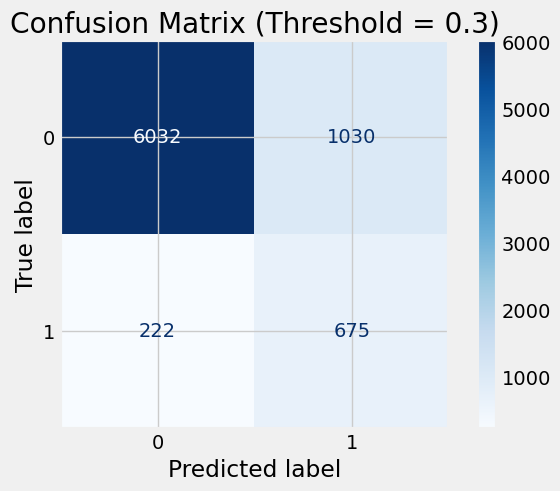


--- Threshold = 0.5 ---
              precision    recall  f1-score   support

           0       0.95      0.92      0.93      7062
           1       0.49      0.62      0.55       897

    accuracy                           0.88      7959
   macro avg       0.72      0.77      0.74      7959
weighted avg       0.90      0.88      0.89      7959

Balanced Accuracy: 0.7684412972913582
Matthews Corr. Coefficient (MCC): 0.4858937422108659
AUC: 0.8844374732225199


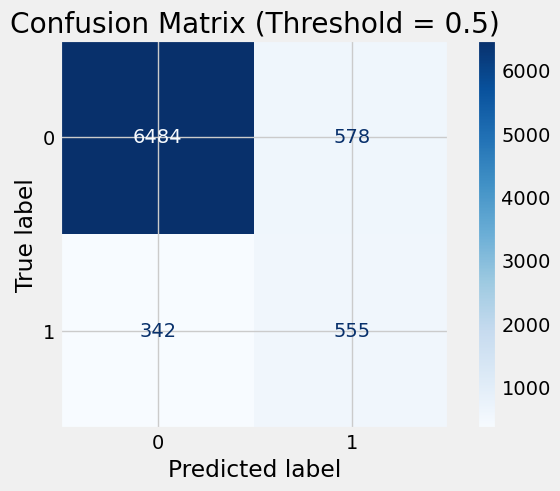


--- Threshold = 0.7 ---
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      7062
           1       0.57      0.49      0.53       897

    accuracy                           0.90      7959
   macro avg       0.75      0.72      0.73      7959
weighted avg       0.89      0.90      0.90      7959

Balanced Accuracy: 0.7205702667913152
Matthews Corr. Coefficient (MCC): 0.47163477462060943
AUC: 0.8844374732225199


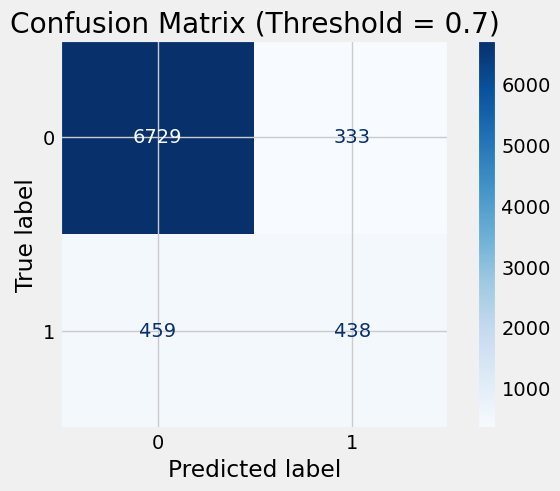


--- DECISION TREE ---


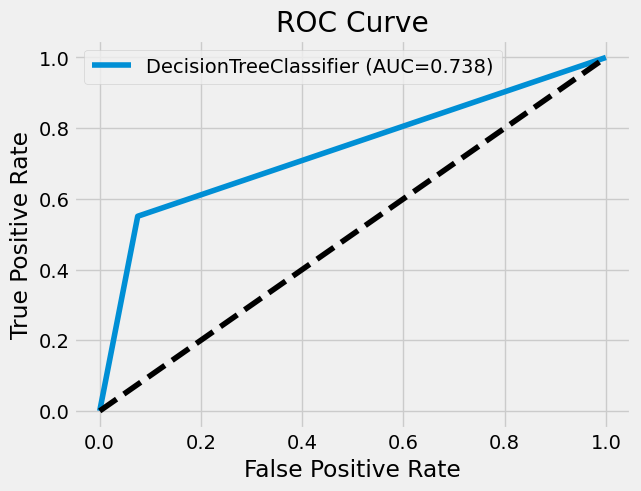


--- Threshold = 0.3 ---
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      7062
           1       0.48      0.55      0.51       897

    accuracy                           0.88      7959
   macro avg       0.71      0.74      0.72      7959
weighted avg       0.89      0.88      0.89      7959

Balanced Accuracy: 0.737837538325145
Matthews Corr. Coefficient (MCC): 0.44925949432618606
AUC: 0.737837538325145


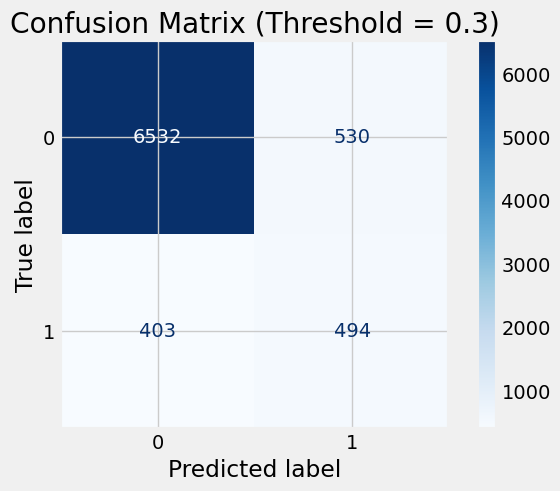


--- Threshold = 0.5 ---
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      7062
           1       0.48      0.55      0.51       897

    accuracy                           0.88      7959
   macro avg       0.71      0.74      0.72      7959
weighted avg       0.89      0.88      0.89      7959

Balanced Accuracy: 0.737837538325145
Matthews Corr. Coefficient (MCC): 0.44925949432618606
AUC: 0.737837538325145


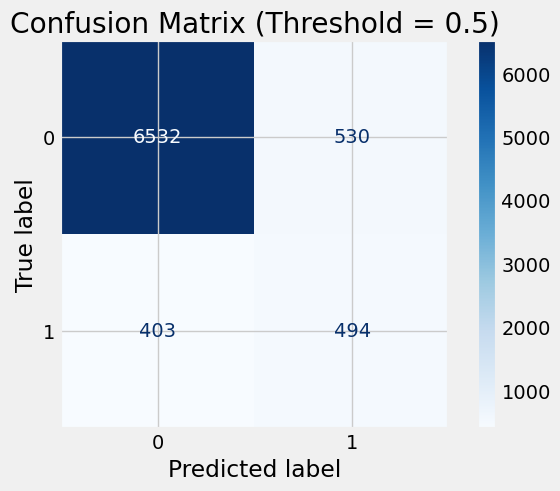


--- Threshold = 0.7 ---
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      7062
           1       0.48      0.55      0.51       897

    accuracy                           0.88      7959
   macro avg       0.71      0.74      0.72      7959
weighted avg       0.89      0.88      0.89      7959

Balanced Accuracy: 0.737837538325145
Matthews Corr. Coefficient (MCC): 0.44925949432618606
AUC: 0.737837538325145


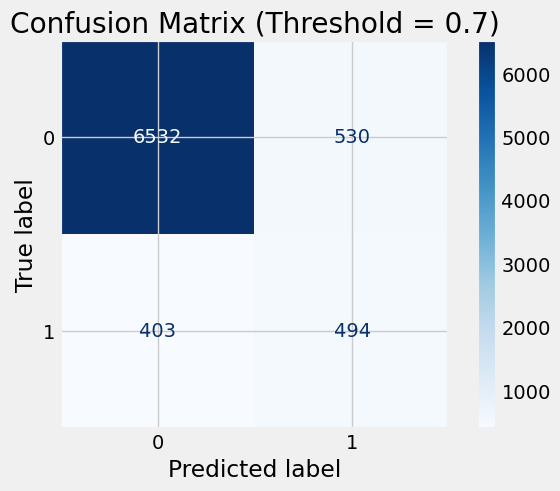


--- K-NEAREST NEIGHBOURS (KNN) ---


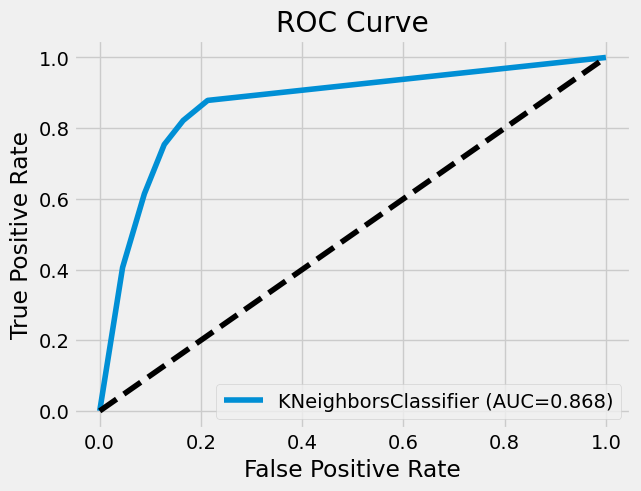


--- Threshold = 0.3 ---
              precision    recall  f1-score   support

           0       0.97      0.84      0.90      7062
           1       0.39      0.82      0.53       897

    accuracy                           0.83      7959
   macro avg       0.68      0.83      0.71      7959
weighted avg       0.91      0.83      0.86      7959

Balanced Accuracy: 0.8284009096686871
Matthews Corr. Coefficient (MCC): 0.48712310835766776
AUC: 0.8675032922290136


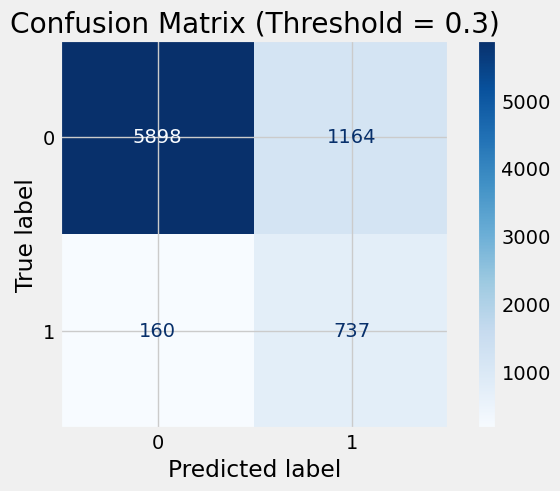


--- Threshold = 0.5 ---
              precision    recall  f1-score   support

           0       0.97      0.87      0.92      7062
           1       0.43      0.75      0.55       897

    accuracy                           0.86      7959
   macro avg       0.70      0.81      0.73      7959
weighted avg       0.90      0.86      0.87      7959

Balanced Accuracy: 0.8130902687993302
Matthews Corr. Coefficient (MCC): 0.4969001346944203
AUC: 0.8675032922290136


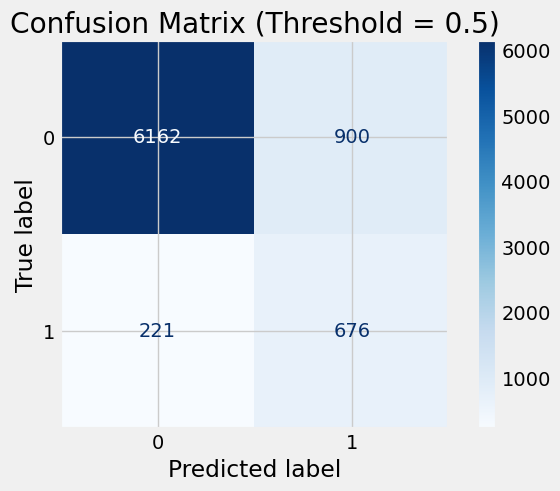


--- Threshold = 0.7 ---
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      7062
           1       0.47      0.61      0.53       897

    accuracy                           0.88      7959
   macro avg       0.71      0.76      0.73      7959
weighted avg       0.89      0.88      0.89      7959

Balanced Accuracy: 0.7630255766176124
Matthews Corr. Coefficient (MCC): 0.4691147417538054
AUC: 0.8675032922290136


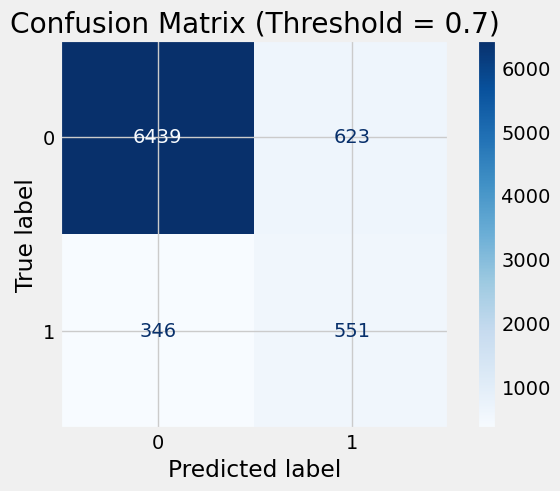


--- NAIVE BAYES ---


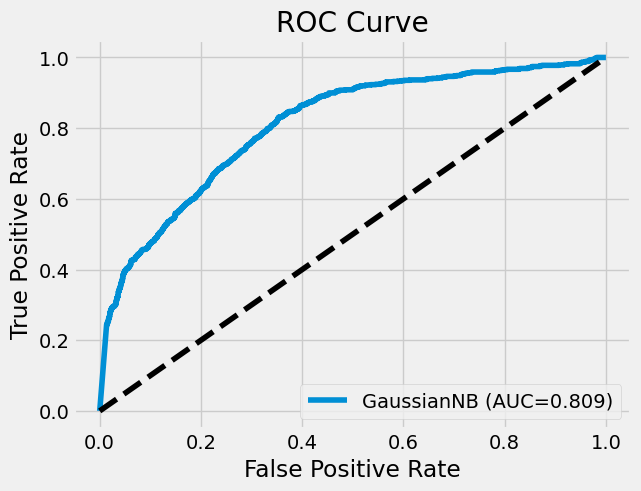


--- Threshold = 0.3 ---
              precision    recall  f1-score   support

           0       0.94      0.85      0.89      7062
           1       0.32      0.56      0.41       897

    accuracy                           0.82      7959
   macro avg       0.63      0.70      0.65      7959
weighted avg       0.87      0.82      0.84      7959

Balanced Accuracy: 0.7040550537096657
Matthews Corr. Coefficient (MCC): 0.32346644575304967
AUC: 0.8089110086265716


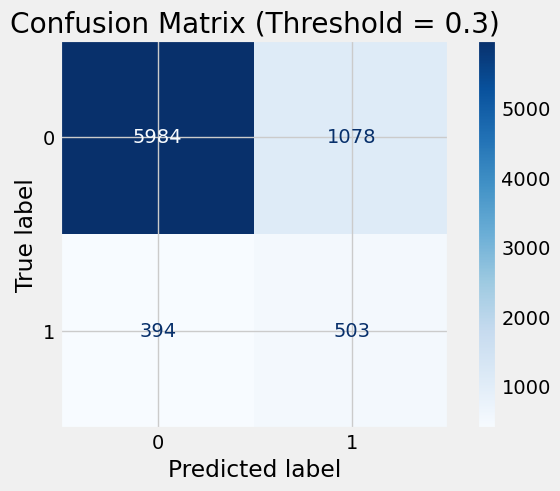


--- Threshold = 0.5 ---
              precision    recall  f1-score   support

           0       0.94      0.87      0.90      7062
           1       0.34      0.53      0.41       897

    accuracy                           0.83      7959
   macro avg       0.64      0.70      0.66      7959
weighted avg       0.87      0.83      0.85      7959

Balanced Accuracy: 0.6980236680561751
Matthews Corr. Coefficient (MCC): 0.3289457967172181
AUC: 0.8089110086265716


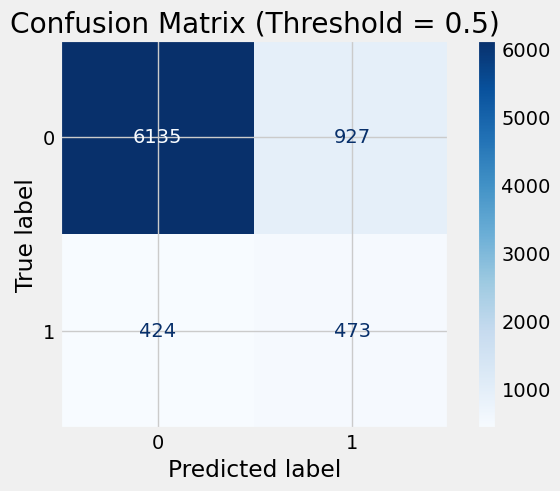


--- Threshold = 0.7 ---
              precision    recall  f1-score   support

           0       0.93      0.89      0.91      7062
           1       0.36      0.49      0.41       897

    accuracy                           0.84      7959
   macro avg       0.64      0.69      0.66      7959
weighted avg       0.87      0.84      0.85      7959

Balanced Accuracy: 0.6893198228021471
Matthews Corr. Coefficient (MCC): 0.33026752614741345
AUC: 0.8089110086265716


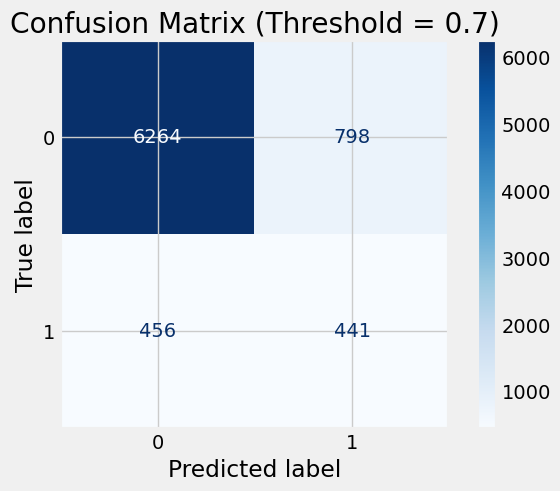


--- XGBOOST ---


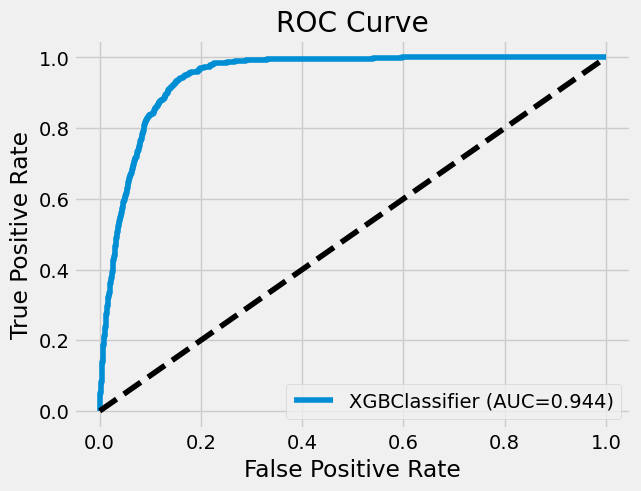


--- Threshold = 0.3 ---
              precision    recall  f1-score   support

           0       0.98      0.91      0.94      7062
           1       0.53      0.82      0.65       897

    accuracy                           0.90      7959
   macro avg       0.75      0.87      0.79      7959
weighted avg       0.93      0.90      0.91      7959

Balanced Accuracy: 0.8654918831676248
Matthews Corr. Coefficient (MCC): 0.6095430434181508
AUC: 0.944394717657619


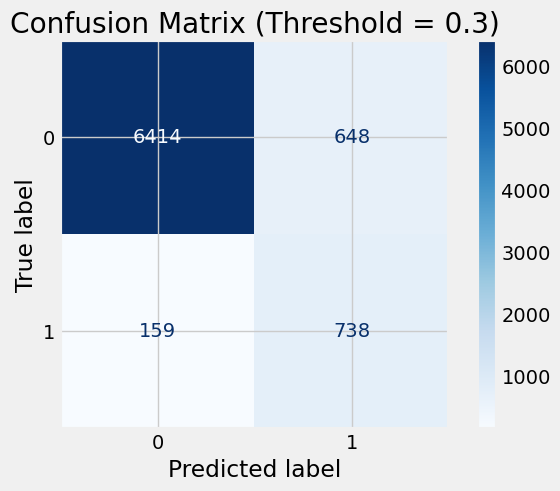


--- Threshold = 0.5 ---
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      7062
           1       0.60      0.62      0.61       897

    accuracy                           0.91      7959
   macro avg       0.77      0.78      0.78      7959
weighted avg       0.91      0.91      0.91      7959

Balanced Accuracy: 0.7826723932981552
Matthews Corr. Coefficient (MCC): 0.5560073553015498
AUC: 0.944394717657619


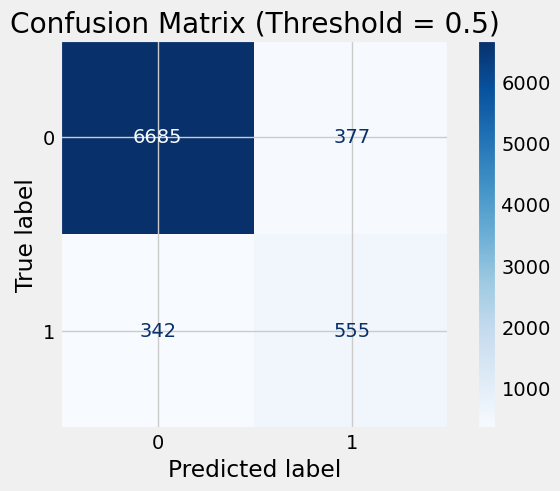


--- Threshold = 0.7 ---
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7062
           1       0.67      0.37      0.48       897

    accuracy                           0.91      7959
   macro avg       0.80      0.67      0.71      7959
weighted avg       0.90      0.91      0.90      7959

Balanced Accuracy: 0.6746355026525689
Matthews Corr. Coefficient (MCC): 0.4564747880486686
AUC: 0.944394717657619


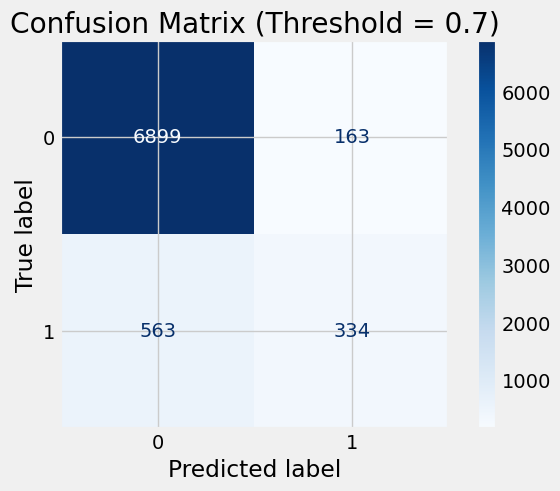


--- LIGHTGBM ---
[LightGBM] [Info] Number of positive: 28243, number of negative: 28243
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006268 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 976
[LightGBM] [Info] Number of data points in the train set: 56486, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


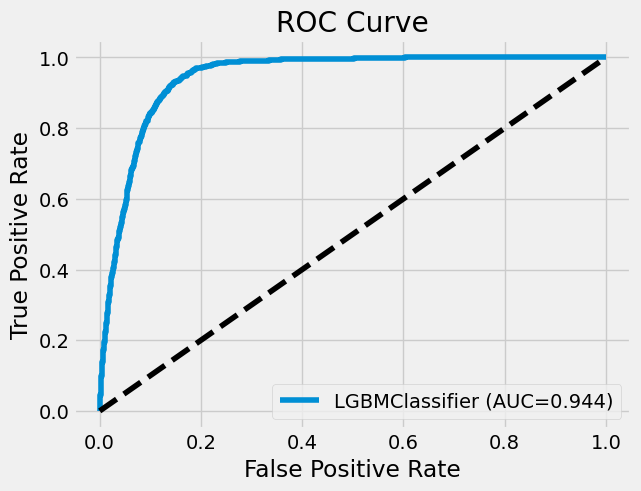


--- Threshold = 0.3 ---
              precision    recall  f1-score   support

           0       0.97      0.91      0.94      7062
           1       0.54      0.80      0.65       897

    accuracy                           0.90      7959
   macro avg       0.76      0.86      0.79      7959
weighted avg       0.92      0.90      0.91      7959

Balanced Accuracy: 0.8578656884223728
Matthews Corr. Coefficient (MCC): 0.6059534725612744
AUC: 0.9439980084027219


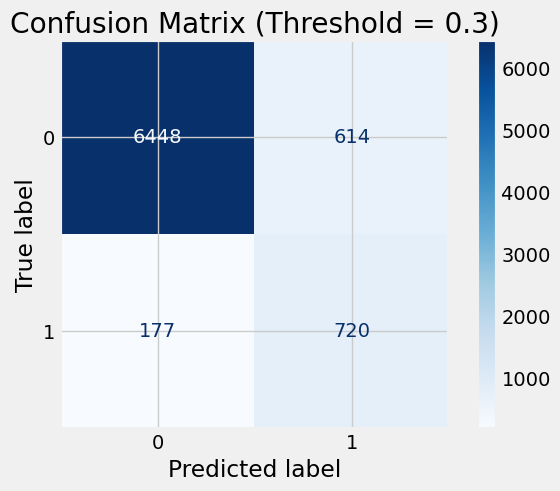


--- Threshold = 0.5 ---
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      7062
           1       0.59      0.61      0.60       897

    accuracy                           0.91      7959
   macro avg       0.77      0.78      0.77      7959
weighted avg       0.91      0.91      0.91      7959

Balanced Accuracy: 0.7775140679447872
Matthews Corr. Coefficient (MCC): 0.547649920584531
AUC: 0.9439980084027219


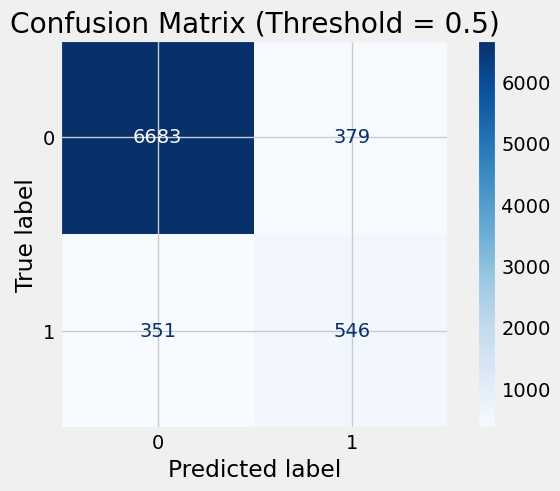


--- Threshold = 0.7 ---
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7062
           1       0.67      0.37      0.48       897

    accuracy                           0.91      7959
   macro avg       0.80      0.67      0.71      7959
weighted avg       0.90      0.91      0.90      7959

Balanced Accuracy: 0.6736622783961264
Matthews Corr. Coefficient (MCC): 0.455646581064163
AUC: 0.9439980084027219


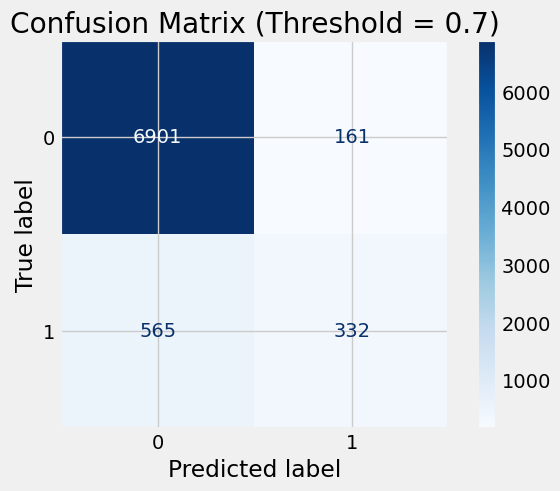


--- MLP (Neural Network) ---


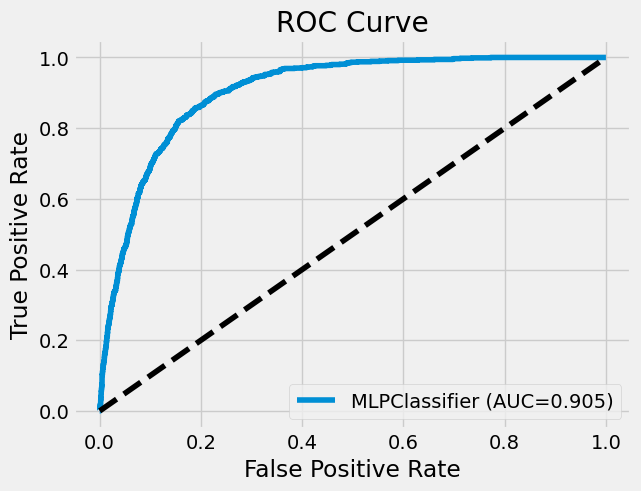


--- Threshold = 0.3 ---
              precision    recall  f1-score   support

           0       0.97      0.84      0.90      7062
           1       0.40      0.82      0.54       897

    accuracy                           0.84      7959
   macro avg       0.69      0.83      0.72      7959
weighted avg       0.91      0.84      0.86      7959

Balanced Accuracy: 0.8315251726466679
Matthews Corr. Coefficient (MCC): 0.4965917021514172
AUC: 0.9054701675587494


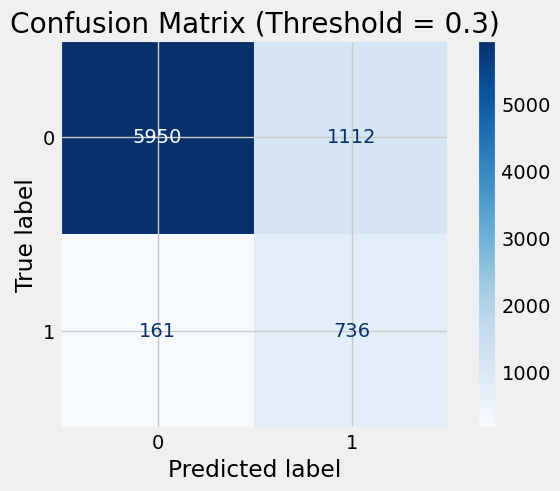


--- Threshold = 0.5 ---
              precision    recall  f1-score   support

           0       0.96      0.89      0.93      7062
           1       0.46      0.71      0.56       897

    accuracy                           0.87      7959
   macro avg       0.71      0.80      0.74      7959
weighted avg       0.90      0.87      0.88      7959

Balanced Accuracy: 0.8013431441915797
Matthews Corr. Coefficient (MCC): 0.5024170639518322
AUC: 0.9054701675587494


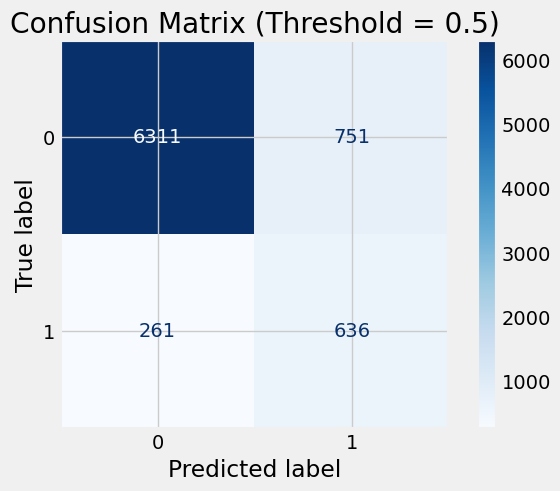


--- Threshold = 0.7 ---
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      7062
           1       0.52      0.55      0.53       897

    accuracy                           0.89      7959
   macro avg       0.73      0.74      0.74      7959
weighted avg       0.89      0.89      0.89      7959

Balanced Accuracy: 0.7430678491222985
Matthews Corr. Coefficient (MCC): 0.4722361920151398
AUC: 0.9054701675587494


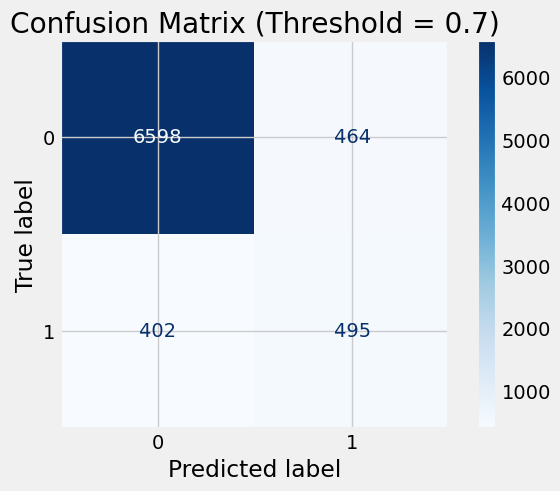

XGB | ROC-AUC CV: 0.9922 ± 0.0004
LGBM | ROC-AUC CV: 0.9925 ± 0.0004
MLP | ROC-AUC CV: 0.9731 ± 0.0051


In [342]:
print("\n--- RANDOM FOREST ---")
rf_model = RandomForestClassifier(random_state=42)

evaluate_model(rf_model, X_train_res, y_train_res, X_test, y_test)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(rf_model, X_train_res, y_train_res, cv=cv, scoring='roc_auc', n_jobs=-1)
print(f"ROC-AUC CV: {scores.mean():.4f} ± {scores.std():.4f}")

print("\n--- LOGISTIC REGRESSION ---")
evaluate_model(LogisticRegression(max_iter=1000),X_train_res, y_train_res, X_test, y_test)


print("\n--- DECISION TREE ---")
dt_model = DecisionTreeClassifier(
    criterion='gini', 
    max_depth=None, 
    min_samples_split=2, 
    random_state=42,
)
evaluate_model(dt_model, X_train_res, y_train_res, X_test, y_test)

print("\n--- K-NEAREST NEIGHBOURS (KNN) ---")
knn_model = KNeighborsClassifier(
    n_neighbors=5,  
    metric='minkowski', 
    p=2             
)
evaluate_model(knn_model, X_train_res, y_train_res, X_test, y_test)

print("\n--- NAIVE BAYES ---")
nb_model = GaussianNB()
evaluate_model(nb_model, X_train_res, y_train_res, X_test, y_test)

print("\n--- XGBOOST ---")
xgb_model = XGBClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_lambda=1.0,
    tree_method="hist",
    eval_metric="logloss",
    n_jobs=-1,
    random_state=42
)

evaluate_model(xgb_model, X_train_res, y_train_res, X_test, y_test)

print("\n--- LIGHTGBM ---")
lgbm_model = LGBMClassifier(
    n_estimators=700,
    learning_rate=0.05,
    num_leaves=31,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_lambda=1.0,
    random_state=42,
    n_jobs=-1
)

evaluate_model(lgbm_model, X_train_res, y_train_res, X_test, y_test)

print("\n--- MLP (Neural Network) ---")
mlp_model = MLPClassifier(
    hidden_layer_sizes=(128, 64),
    activation="relu",
    solver="adam",
    learning_rate_init=1e-3,
    alpha=1e-4,               
    batch_size=256,
    max_iter=100,
    early_stopping=True,
    n_iter_no_change=10,
    random_state=42
)

evaluate_model(mlp_model, X_train_res, y_train_res, X_test, y_test)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, mdl in [
    ("XGB", xgb_model),
    ("LGBM", lgbm_model),
    ("MLP", mlp_model)
]:
    scores = cross_val_score(mdl, X_train_res, y_train_res, cv=cv, scoring="roc_auc", n_jobs=-1)
    print(f"{name} | ROC-AUC CV: {scores.mean():.4f} ± {scores.std():.4f}")